In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import csv

pd.options.mode.chained_assignment = None

## Crezione DataSet e analisi preliminari

In [2]:
dati =pd.read_excel('reportCompleto.xlsx')

In [3]:
indici_da_eliminare=dati.loc[dati['esito_ti'].isnull()].index
dati.drop(indici_da_eliminare,inplace=True)
dati.reset_index(inplace=True)
dati.drop(columns=('index'),inplace=True)

In [4]:
dati.drop(columns=('Unnamed: 0'),inplace=True)

In [5]:
dati.loc[:,'esito_ti':'outcome_ti_complete'].shape

(287, 56)

Individuo le colonne completamente vuote, ma per il momento evito di eliminarle, intanto le salvo in un file csv, nel caso non siano necessarie si procederà a rimuoverle a seguore.

In [6]:
colonne_vuote = list()

for column in dati.columns:
    if dati[column].isnull().all():
        colonne_vuote.append(column)

In [7]:
len(colonne_vuote)

2484

In [8]:
dati.shape[1]-len(colonne_vuote)

4511

In [9]:
dati1 = dati.copy()

In [10]:
with open('Dati da segnalare/colonne_vuote.txt', 'w') as f:
    f.write('le colonne completamente vuote sono ' + str(len(colonne_vuote)) + '\n' )
    for line in colonne_vuote:
        f.write(line)
        f.write('\n')

#dati.drop(columns=colonne_vuote,axis=1,inplace=True)


Ospedali nella sperimentazione con numero di pazienti diviso per ospedale

In [11]:
ospedali= dict(dati['redcap_data_access_group'].value_counts())

In [12]:
ospedali

{'esine_bs_presidio': 48,
 'perugia_ospedale_s': 29,
 'firenze_careggi_on': 28,
 'milano_irccs_polic': 26,
 'pistoia_ospedale_s': 25,
 'pavia_fondazione_i': 21,
 'roma_cristo_re': 13,
 'roma_european_hosp': 12,
 'torino_osp_maria_v': 11,
 'padova_aou_di_pado': 10,
 'roma_aureliah': 8,
 'firenze_careggi_ca': 7,
 'verona_azienda_osp': 7,
 'biella_ospedale_de': 7,
 'firenze_ospedale_s': 7,
 'benevento_ospedale': 6,
 'sassari_ospedale_c': 3,
 'bologna_ospedale_m': 3,
 'roma_ao_s_giovanni': 3,
 'napoli_aou_della_c': 2,
 'firenze_san_giovan': 2,
 'milano__irccs_cent': 1,
 'bergamo_ospedale_p': 1}

In [13]:
len(ospedali)

23

In [14]:
dati1.drop(columns=colonne_vuote, inplace=True)

In [15]:
counter_numeric=0
counter_obj=0
count = 0
for col in dati1.columns:
    
    if dati1[col].dtypes == 'float64':
        counter_numeric = counter_numeric +1
    elif dati1[col].dtypes == 'object':
        counter_obj = counter_obj + 1
    else:
        count = count +1

In [16]:
counter_numeric


2183

## Indicazioni al trattamento

Dati sul target ossia sugli obiettivi di trattamenti possibili, ogni paziente ovviamente ha un solo obiettivo

In [17]:
target_data = dict(dati['target'].value_counts())

In [18]:
target_data

{3: 179, 2: 64, 1: 44}

In [19]:
print('I pazienti sui targeti sono così distribuiti:\n 1-Sostituzione della funzione renale(Indicazioni assolute alla RRT):', list(target_data.values())[2], '\n 2-Modulazione della risposta infiammatoria:', list(target_data.values())[1],'\n 3-Supporto della funzione renale e modulazione della risposta infiammatoria (Indicazioni relative alla RRT):',list(target_data.values())[0])

I pazienti sui targeti sono così distribuiti:
 1-Sostituzione della funzione renale(Indicazioni assolute alla RRT): 44 
 2-Modulazione della risposta infiammatoria: 64 
 3-Supporto della funzione renale e modulazione della risposta infiammatoria (Indicazioni relative alla RRT): 179


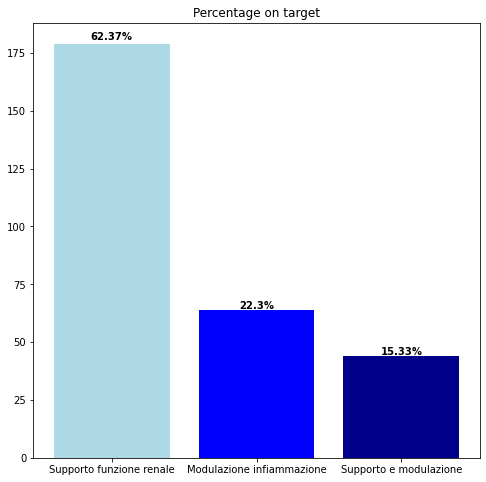

In [20]:
# depict illustration
plt.figure(figsize=(8, 8))
targets=['Supporto funzione renale', 'Modulazione infiammazione', 'Supporto e modulazione']
colors_list = ['lightblue', 'blue', 'darkblue']
graph = plt.bar(targets, target_data.values(), color=colors_list)
plt.title('Percentage on target')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round((list(target_data.values())[i])/287*100,2))+'%',
            ha='center',
            weight='bold')
    i += 1
plt.show()


Indicazioni al trattamento le 6 diverse indicazioni le salviamo in un diverso dataset e cerchiamo se esiste una correlazione tra le possibili indicazioni, considerando anche che ad ogni paziente può corrispondere più di un'indicazione

In [21]:
indicazioni_terapia = dati[dati.columns[dati.columns.get_loc('indicaz_terap_renal___1'):dati.columns.get_loc('indicaz_terap_renal___1')+6]]

In [22]:
indicazioni_terapia

,indicaz_terap_renal___1,indicaz_terap_renal___2,indicaz_terap_renal___3,indicaz_terap_renal___4,indicaz_terap_renal___5,indicaz_terap_renal___6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
282,0,0,0,1,0,1
283,1,1,1,1,0,0
284,1,1,1,1,0,0
285,0,1,1,1,0,0


Attraverso l'analisi delle correlazioni si può verificare che come ci si aspetterebbe le indicazioni al trattamento risultano bene o male tra di loro tutte linearmente indipendenti.


In [23]:
indicazioni_terapia.describe()

,indicaz_terap_renal___1,indicaz_terap_renal___2,indicaz_terap_renal___3,indicaz_terap_renal___4,indicaz_terap_renal___5,indicaz_terap_renal___6
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.571429,0.452962,0.515679,0.439024,0.031359,0.024390
std,0.495736,0.498652,0.500627,0.497135,0.174590,0.154527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
indicazioni_terapia.corr()

,indicaz_terap_renal___1,indicaz_terap_renal___2,indicaz_terap_renal___3,indicaz_terap_renal___4,indicaz_terap_renal___5,indicaz_terap_renal___6
indicaz_terap_renal___1,1.000000,0.321281,0.358254,0.156064,0.075026,-0.136931
indicaz_terap_renal___2,0.321281,1.000000,0.321607,0.351584,-0.043241,-0.007747
indicaz_terap_renal___3,0.358254,0.321607,1.000000,0.365617,0.094364,-0.027560
indicaz_terap_renal___4,0.156064,0.351584,0.365617,1.000000,0.082534,0.087700
indicaz_terap_renal___5,0.075026,-0.043241,0.094364,0.082534,1.000000,-0.028449
indicaz_terap_renal___6,-0.136931,-0.007747,-0.027560,0.087700,-0.028449,1.000000


In [25]:
indicazioni_terapia.var()

indicaz_terap_renal___1    0.245754
indicaz_terap_renal___2    0.248654
indicaz_terap_renal___3    0.250627
indicaz_terap_renal___4    0.247143
indicaz_terap_renal___5    0.030482
indicaz_terap_renal___6    0.023879
dtype: float64

Non hanno una varianza eccellente soprattutto terapia 5 e 6, ma anche le altre 4 non hanno valori eccellenti, quindi ci si potrebbe aspettare in futuro che nell'analisi possano non dare un contributo al risultato.

Elimino tutti i dati non necessari che sono tutti quelli relativi ai valori nefrotossici e relativi a problemi di sepsi, mantengo solamente i lattati che invece sono ritenuti fondamentali

In [26]:
ind_nefro= dati.columns.get_loc('nefrotox')
ind_farm_dose= dati.columns.get_loc('farm_dose')

In [27]:
dati.drop(columns=list(dati.columns[ind_nefro:ind_farm_dose+1]),inplace=True)

I dati dei lattati sono molto importanti inizialmente vengono settati solo sui pazienti in sepsi, successivamente però viene riportato su tutti, quindi momentaneamente teniamoli sospesi, mentre risultano non utili ai fini dell'analisi i rimanenti dati.

In [28]:
dati_sepsi = dati.loc[dati['target'] != 1 ]

In [29]:
dati_sepsi.shape

(243, 6941)

In [30]:
dati_sepsi['lac_mmol'].fillna(dati_sepsi['lac_mg_mmol'],inplace=True)

In [31]:
dati_sepsi['lac_mmol'] = dati_sepsi['lac_mmol'].astype(str).apply(lambda x: x.replace(',','.'))
dati['lac_mmol'] = dati_sepsi['lac_mmol'].astype(float)

Rimuovo le colonne,'unit_latt', 'lac_mg', 'lac_mg_mmol','lac_mmol_mg' perchè posso tutte riassumerle in 'lac_mmol'

In [32]:
dati.drop(columns=['unit_latt', 'lac_mg', 'lac_mg_mmol','lac_mmol_mg'],inplace=True)

In [33]:
dati_sepsi['lac_2_4_mg'] = dati_sepsi['lac_2_4_mg'].astype(str).apply(lambda x: x.replace(',','.'))
dati_sepsi['lac_2_4_mmol'] = dati_sepsi['lac_2_4_mmol'].astype(str).apply(lambda x: x.replace(',','.'))

dati_sepsi[['lac_2_4_mg','lac_2_4_mmol']]=dati_sepsi[['lac_2_4_mg','lac_2_4_mmol']].astype(float)

In [34]:
dati_sepsi['lac_2_4_mmol'].fillna(dati_sepsi['lac_2_4_mg'] * 0.111,inplace=True)

In [35]:
dati['lac_2_4_mmol']=dati_sepsi['lac_2_4_mmol']

In [36]:
dati.drop(columns=['lac_2_4_mg'],inplace=True)

In [37]:
dati[['lac_mmol','lac_2_4_mmol']].describe()

,lac_mmol,lac_2_4_mmol
count,231.000000,118.000000
mean,3.479697,4.912381
std,3.396832,3.808383
min,0.077700,0.299700
25%,1.500000,2.392500
50%,2.330000,3.100000
75%,4.000000,6.575000
max,20.000000,18.000000


In [38]:
mancanti_latt= list(dati['record_id'].loc[dati['lac_mmol'].isnull()])
mancanti_latt_2_4 =list(dati['record_id'].loc[dati['lac_2_4_mmol'].isnull()])

with open('Dati da segnalare/lattati_indicazioni.txt', 'w') as f:
    f.write("elenco di record_id per cui risultano mancanti nelle indicazioni al trattamento i lattati: \n")
    f.write('\n')
    for lat in mancanti_latt:
        f.write(str(lat) + '\n')

with open('Dati da segnalare/lattati_2_4_indicazioni.txt', 'w') as f:
    f.write("elenco di record_id per cui risultano mancanti nelle indicazioni al trattamento i lattati dopo 2/4 ore: \n")
    f.write('\n')
    for latt in mancanti_latt_2_4:
        f.write(str(latt) + '\n')



In [39]:
dati.drop(columns=list(dati.columns)[dati.columns.get_loc('ipot'):dati.columns.get_loc('ipot')+5],inplace=True)

## Tempo 0

### Cervello

Per prima cosa si passa ad analizzare i valori del cervello ed in particolare si analizza il Glasgow importantissimo anche a seguire

In [40]:
first = dati.columns.get_loc('occhi_gcs')
first

56

In [41]:
dati[dati.columns[first : ]]

,occhi_gcs,verb_gcs,moto_gcs,gcs,rass,sedaz_pz,sedaz_farm_pz___1,sedaz_farm_pz___2,sedaz_farm_pz___3,sedaz_farm_pz___4,...,ultrafiltr_totale,rac_cam_out,tip_camp_out___1,tip_camp_out___2,tip_camp_out___3,tip_camp_out___4,tip_camp_al_out,n_camp_out,q_camp_out,outcome_ti_complete
0,3,1,5,9,10.0,1.0,0,1,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
1,2,4,5,11,6.0,1.0,0,1,0,1,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
2,3,4,6,13,4.0,0.0,0,0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
3,2,1,5,8,10.0,1.0,0,0,0,1,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
4,2,1,2,5,10.0,1.0,0,1,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,4,5,6,15,5.0,0.0,0,0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
283,1,1,1,3,10.0,1.0,0,0,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
284,4,5,6,15,5.0,0.0,0,0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
285,1,1,1,3,10.0,1.0,0,0,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2


In [42]:
senza_gcs = list(dati['record_id'].loc[(dati['occhi_gcs'].isnull()) | (dati['verb_gcs'].isnull()) |(dati['moto_gcs'].isnull()) |(dati['gcs'].isnull())])

In [43]:
with open('Dati da segnalare/gcs_missed.txt', 'w') as f:
    f.write('Per i seguenti ID risultano totalmente assenti i dati su apertura occhi, risposta veerbale e motoria\n' )
    for gcs in senza_gcs:
        f.write(gcs)
        f.write('\n')


In [44]:
cervello = dati[dati.columns[first : first +4]]

In [45]:
cervello.corr()

,occhi_gcs,verb_gcs,moto_gcs,gcs
occhi_gcs,1.000000,0.811297,0.868692,0.934141
verb_gcs,0.811297,1.000000,0.819511,0.922682
moto_gcs,0.868692,0.819511,1.000000,0.966357
gcs,0.934141,0.922682,0.966357,1.000000


In [46]:
cervello.var()

occhi_gcs     1.066153
verb_gcs      1.673278
moto_gcs      3.769036
gcs          16.274506
dtype: float64

In [47]:
cervello.describe()

,occhi_gcs,verb_gcs,moto_gcs,gcs
count,287.000000,287.000000,287.000000,287.000000
mean,1.599303,1.564460,2.156794,5.320557
std,1.032547,1.293552,1.941400,4.034167
min,1.000000,1.000000,1.000000,3.000000
25%,1.000000,1.000000,1.000000,3.000000
50%,1.000000,1.000000,1.000000,3.000000
75%,2.000000,1.000000,4.000000,6.000000
max,4.000000,5.000000,6.000000,15.000000


In generale sia i valori della devizione, che la correlazione tra le colonne fanno immaginare che questi dati potrebbero avere un forte impatto ai fini dell'analisi

In [48]:
gcs_pzt= dict(cervello['gcs'].value_counts(ascending=True,dropna=False))

In [49]:
gcs_pzt


{12: 2,
 9: 4,
 11: 4,
 8: 5,
 4: 5,
 10: 5,
 5: 8,
 14: 8,
 7: 8,
 6: 11,
 13: 13,
 15: 19,
 3: 195}

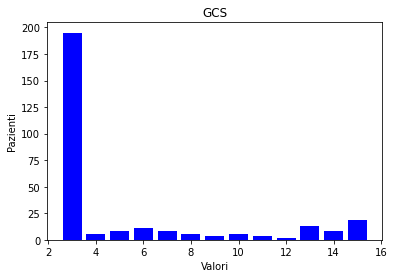

In [50]:
plt.bar(gcs_pzt.keys(), gcs_pzt.values(),color='blue')
plt.xlabel('Valori')
plt.ylabel('Pazienti')
plt.title('GCS')
plt.show()

I dati di Rass li ignoro perchè spesso non segnati in maniera corretta poichè spesso il medico decide di sedare il paziente in maniera arbitraria. Ugualmente ai fini dell'analisi ignoro anche tutto ciò che riguarda la sedazione.

In [51]:
dati[dati.columns[first + 4 : first +20]]

,rass,sedaz_pz,sedaz_farm_pz___1,sedaz_farm_pz___2,sedaz_farm_pz___3,sedaz_farm_pz___4,sedaz_farm_pz___5,sedaz_farm_pz___6,sedaz_farm_pz___7,mac_sevo,dose_propofol,dose_dexdor,dose_bzd,dose_barbi,oppioidi_sedaz,dose_altroo
0,10.0,1.0,0,1,0,1,0,1,1,NaN,0.4,NaN,0.40,NaN,Sufentanil 0.4,Rocuronio 0.4
1,6.0,1.0,0,1,0,1,0,0,0,NaN,0.4,NaN,0.40,NaN,NaN,NaN
2,4.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,1.0,0,0,0,1,0,0,1,NaN,NaN,NaN,0.50,NaN,NaN,recuronio 0.5 ( midazolam come benzodiazepina)
4,10.0,1.0,0,1,0,1,0,1,1,NaN,0.5,NaN,0.50,NaN,fentanyl 0.5,rocuronio 0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,5.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,10.0,1.0,0,0,0,1,0,0,0,NaN,NaN,NaN,0.03,NaN,NaN,NaN
284,5.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,10.0,1.0,0,0,0,1,0,0,0,NaN,NaN,NaN,0.10,NaN,NaN,NaN


In [52]:
dati.drop(columns=list(dati.columns[first + 4 : first +20]),inplace=True)

### Cuore

#### Frequenza

In [53]:
second = dati.columns.get_loc('fc')
second

60

In [54]:
dati[dati.columns[second : ]]

,fc,ritmo,arre_card,ps,pd,pm,temp,vasoattivi,vasoatt_quali___1,vasoatt_quali___2,...,ultrafiltr_totale,rac_cam_out,tip_camp_out___1,tip_camp_out___2,tip_camp_out___3,tip_camp_out___4,tip_camp_al_out,n_camp_out,q_camp_out,outcome_ti_complete
0,100.0,1.0,0.0,128,75,92.574,37.3,0.0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
1,90.0,1.0,0.0,155,80,104.895,36.8,0.0,0,0,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
2,80.0,1.0,0.0,141,81,100.899,37.2,0.0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
3,90.0,2.0,0.0,123,55,77.589,36.6,0.0,0,0,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
4,100.0,1.0,0.0,114,71,85.248,37.3,0.0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,80.0,1.0,0.0,170,90,116.550,36.1,0.0,0,0,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
283,60.0,1.0,0.0,90,40,56.610,34.6,1.0,1,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
284,150.0,1.0,0.0,100,70,79.920,34.0,1.0,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
285,140.0,1.0,0.0,90,45,59.940,36.4,1.0,0,1,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2


Per prima cosa verifichiamo i dati relativi a frequenza, ritmo pressione e temperatura. Prima di tutto però bisogna portare la pressione media e la temperatura a valori float.

In [55]:
cardio = dati[dati.columns[second : second + 7 ]]

In [56]:
cardio.describe()

,fc,ritmo,arre_card,ps,pd,pm,temp
count,285.000000,286.000000,286.000000,287.000000,287.000000,287.000000,283.000000
mean,90.982456,1.244755,0.020979,112.829268,60.250871,77.699226,36.583746
std,21.995271,0.484377,0.143565,22.037844,13.296766,14.581036,1.036917
min,50.000000,1.000000,0.000000,60.000000,30.000000,39.960000,33.000000
25%,75.000000,1.000000,0.000000,96.000000,50.000000,66.600000,36.000000
50%,89.000000,1.000000,0.000000,110.000000,60.000000,77.256000,36.800000
75%,101.000000,1.000000,0.000000,128.000000,70.000000,89.910000,37.000000
max,161.000000,3.000000,1.000000,198.000000,95.000000,125.874000,41.000000


In [57]:
rtm=dict(cardio['ritmo'].value_counts())

In [58]:
rtm

{1.0: 223, 2.0: 56, 3.0: 7}

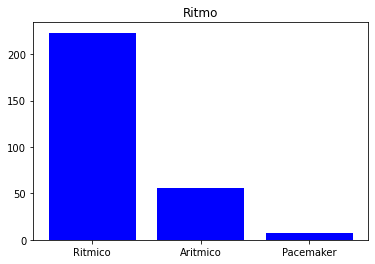

In [59]:
plt.bar(['Ritmico','Aritmico','Pacemaker'], rtm.values(), color='blue')
plt.title('Ritmo')
plt.show()

In [60]:
cardio['arre_card'].value_counts()

0.0    280
1.0      6
Name: arre_card, dtype: int64

In [61]:
frequenza = [dict(cardio['fc'].value_counts()),
     dict(cardio['ps'].value_counts()),
     dict(cardio['pd'].value_counts()),
     dict(cardio['pm'].value_counts()),
     dict(cardio['temp'].value_counts())]

In [62]:
ritmo = dict(cardio['ritmo'].value_counts())
arresto = dict(cardio['arre_card'].value_counts())

In [63]:
ritmo, arresto

({1.0: 223, 2.0: 56, 3.0: 7}, {0.0: 280, 1.0: 6})

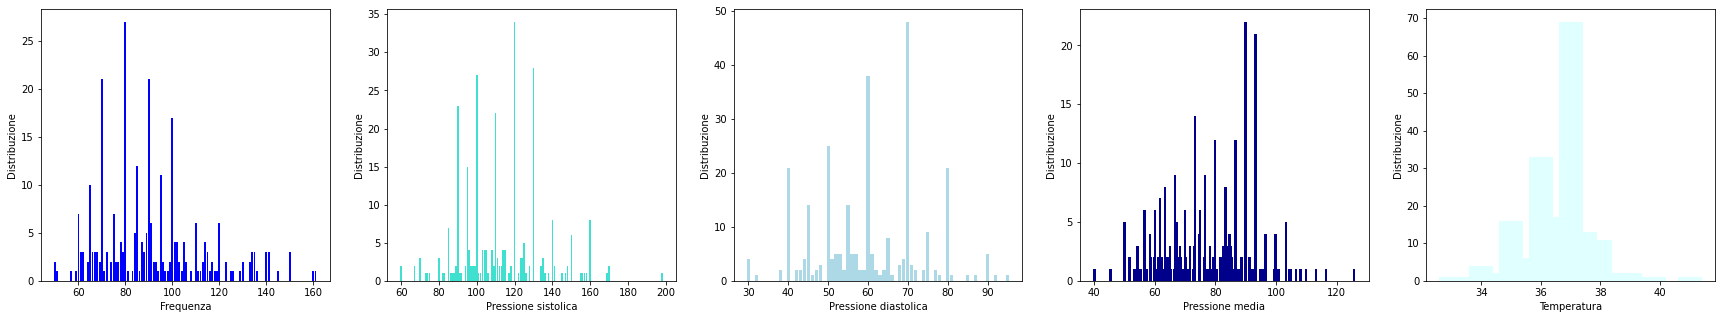

In [64]:
fig, axes = plt.subplots(1,5, figsize=(30,5))
color = ('blue','turquoise', 'lightblue', 'darkblue', 'lightcyan')
title= ('Frequenza', 'Pressione sistolica', 'Pressione diastolica', 'Pressione media', 'Temperatura')

for i in range(len(frequenza)):
    axes[i].set_xlabel(title[i])
    axes[i].set_ylabel('Distribuzione')
    axes[i].bar(frequenza[i].keys(),frequenza[i].values(), color=color[i])


In [65]:
cardio.var()

fc           483.791945
ritmo          0.234622
arre_card      0.020611
ps           485.666553
pd           176.803977
pm           212.606609
temp           1.075196
dtype: float64

In [66]:
cardio.corr()

,fc,ritmo,arre_card,ps,pd,pm,temp
fc,1.000000,0.092494,-0.003364,-0.254600,-0.104750,-0.191753,0.147314
ritmo,0.092494,1.000000,-0.023912,-0.170789,-0.132490,-0.166400,0.015119
arre_card,-0.003364,-0.023912,1.000000,-0.078526,-0.066669,-0.080008,-0.033951
ps,-0.254600,-0.170789,-0.078526,1.000000,0.618029,0.878652,0.103920
pd,-0.104750,-0.132490,-0.066669,0.618029,1.000000,0.918393,0.085074
pm,-0.191753,-0.166400,-0.080008,0.878652,0.918393,1.000000,0.103910
temp,0.147314,0.015119,-0.033951,0.103920,0.085074,0.103910,1.000000


In [67]:
cardio.loc[dati['fc'].isnull() | dati['ritmo'].isnull() | dati['pm'].isnull() | dati['temp'].isnull()]

,fc,ritmo,arre_card,ps,pd,pm,temp
64,88.0,1.0,0.0,95,30,51.615,NaN
65,114.0,2.0,0.0,85,53,63.603,NaN
171,100.0,2.0,1.0,100,50,66.600,NaN
194,67.0,1.0,0.0,150,60,89.910,NaN
265,NaN,1.0,0.0,130,70,89.910,37.0
281,NaN,NaN,0.0,100,60,73.260,35.0


In [68]:
frequenza_miss = np.array(dati[['record_id','fc','ritmo','pm','temp']].loc[dati['fc'].isnull() | dati['ritmo'].isnull() | dati['pm'].isnull()|dati['temp'].isnull()])

In [69]:
with open('Dati da segnalare/miss_frequenza.txt', 'w') as f:
    f.write('All\'interno del file sono riportati i record_id dei pazienti per i quali risultano mancanti i valori della frequenza cardiaca, del ritmo e della pressione. \n'  )
    f.write('\n')
    f.write('[record_id  fc  ritmo  pm  temp] \n') 
    f.write('\n')
    for fr in frequenza_miss:
        f.write(str(fr))
        f.write('\n')


Posso fissare i dati dei vasoattivi mancanti pari a 0.0 poichè non ci sono indicazioni su quali vasoattivi vengano usati, quindi è compatibile pensare che non vengano affatto usati

#### Vasoattivi

In [70]:
vaso = dati[dati.columns[second + 7: second + 31 ]]

In [71]:
vaso['vasoattivi'].value_counts()

1.0    225
0.0     61
Name: vasoattivi, dtype: int64

In [72]:
vaso['vasoatt_quali___1'].loc[vaso['vasoatt_quali___11']!=0]

220    1
Name: vasoatt_quali___1, dtype: int64

In [73]:
vaso.iloc[:,7].value_counts()

0    287
Name: vasoatt_quali___7, dtype: int64

In [74]:
dict(vaso.iloc[:,1:12].value_counts())

{(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 144,
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 62,
 (0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0): 18,
 (1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0): 9,
 (0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0): 8,
 (1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 7,
 (1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0): 6,
 (0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0): 6,
 (1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0): 5,
 (1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0): 4,
 (0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0): 3,
 (0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0): 3,
 (0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0): 3,
 (0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0): 2,
 (0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0): 1,
 (0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0): 1,
 (1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1): 1,
 (1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0): 1}

In [75]:
dosi_vasopress_mancanti = list()
for i in range(0,10):
    dosi_vasopress_mancanti.append(dati['record_id'].loc[(vaso[vaso.columns[12+i]].isnull()) & (vaso[vaso.columns[1+i]]==1) ])
dosi_vasopress_mancanti.append(dati[['record_id','dos_altro']].loc[(vaso['vasoatt_quali___11']==1)])

In [76]:
with open('Dati da segnalare/miss_vasoattivi.txt', 'w') as f:
    f.write('All\'interno del file sono riportati i record_id dei pazienti per i quali risultano mancanti i valori dei dosaggi dei vasopressori che vengono segnalati come somministrati.\n'+
           'A chiusura vi è anche anche riportato l\'unico vasopressore differente usato, per il quale però non è riportato il dosaggio, ma solamente il tipo di farmaco usato.\n')
    f.write('\n')
    i=0
    for vasop in dosi_vasopress_mancanti:
        f.write(vaso.columns[12+i])
        f.write('\n')
        f.write(str(vasop))
        f.write('\n')
        i+=1


In [77]:
dati[dati.columns[79:90]] = dati[dati.columns[79:90]].fillna(0)

In [78]:
dati.columns.get_loc('adr_dos')

79

In [79]:
dati.columns[79:90]

Index(['adr_dos', 'nora_dos', 'vasop_dos', 'idroc_dos', 'dos_dob', 'dos_dop',
       'dos_enox', 'dos_levo', 'dos_terli', 'dos_milri', 'dos_altro'],
      dtype='object')

In [80]:
dati[dati.columns[79:90]]

,adr_dos,nora_dos,vasop_dos,idroc_dos,dos_dob,dos_dop,dos_enox,dos_levo,dos_terli,dos_milri,dos_altro
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
283,0.1,1.3,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
284,0.0,0.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
285,0.0,0.1,0.03,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0


Ulteriore passaggio è quello di determinare la distribuzione dei vasoattivi, rispetto ai pazienti, loro varianza e tutto ciò che può risultare interessante per analisi future.

In [81]:
risultati = dict(dati[dati.columns[79:90]].value_counts())

In [82]:
len(list(risultati.keys()))

119

In [83]:
"""
myFile = open('vasoattivi.csv', 'r+')
writer = csv.writer(myFile)

writer = csv.writer(myFile)
writer.writerow(('adr_dos','nora_dos','vasop_dos','idroc_dos','dos_dob','dos_dop','dos_enox','dos_levo','dos_terli','dos_milri'))
for row in risultati.keys():
    writer.writerow(row)
myFile.close()
"""

"\nmyFile = open('vasoattivi.csv', 'r+')\nwriter = csv.writer(myFile)\n\nwriter = csv.writer(myFile)\nwriter.writerow(('adr_dos','nora_dos','vasop_dos','idroc_dos','dos_dob','dos_dop','dos_enox','dos_levo','dos_terli','dos_milri'))\nfor row in risultati.keys():\n    writer.writerow(row)\nmyFile.close()\n"

In [84]:
dati[dati.columns[79:90]].corr()

,adr_dos,nora_dos,vasop_dos,idroc_dos,dos_dob,dos_dop,dos_enox,dos_levo,dos_terli,dos_milri
adr_dos,1.000000,0.189200,0.125960,0.046959,0.111807,-0.023607,NaN,0.144245,-0.016822,NaN
nora_dos,0.189200,1.000000,0.264943,0.094614,0.094828,-0.015787,NaN,0.007619,0.124431,NaN
vasop_dos,0.125960,0.264943,1.000000,0.423009,-0.019253,-0.033923,NaN,-0.030663,-0.024174,NaN
idroc_dos,0.046959,0.094614,0.423009,1.000000,-0.014134,0.127531,NaN,-0.017967,-0.014164,NaN
dos_dob,0.111807,0.094828,-0.019253,-0.014134,1.000000,-0.022867,NaN,0.094721,-0.016295,NaN
dos_dop,-0.023607,-0.015787,-0.033923,0.127531,-0.022867,1.000000,NaN,-0.009063,-0.007145,NaN
dos_enox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dos_levo,0.144245,0.007619,-0.030663,-0.017967,0.094721,-0.009063,NaN,1.000000,-0.006458,NaN
dos_terli,-0.016822,0.124431,-0.024174,-0.014164,-0.016295,-0.007145,NaN,-0.006458,1.000000,NaN
dos_milri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
x = dati[dati.columns[79:89]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.var()

0    0.008019
1    0.023986
2    0.023710
3    0.014087
4    0.015360
5    0.006934
6    0.000000
7    0.003736
8    0.003679
9    0.000000
dtype: float64

In [86]:
vaso = dati[dati.columns[second + 7: second + 31 ]]

In [87]:
vaso

,vasoattivi,vasoatt_quali___1,vasoatt_quali___2,vasoatt_quali___3,vasoatt_quali___4,vasoatt_quali___5,vasoatt_quali___6,vasoatt_quali___7,vasoatt_quali___8,vasoatt_quali___9,...,vasop_dos,idroc_dos,dos_dob,dos_dop,dos_enox,dos_levo,dos_terli,dos_milri,dos_altro,vis
0,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
1,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
2,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
283,1.0,1,1,1,0,0,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,140.104167
284,1.0,0,1,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,80.000000
285,1.0,0,1,1,0,1,0,0,0,0,...,0.03,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,15.083333


In [88]:
vaso['vis'] = vaso['vis'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)
dati['vis']= vaso['vis']

In [89]:
vis_result=dict(vaso['vis'].describe())

In [90]:
vis_result

{'count': 287.0,
 'mean': 32.80899461218219,
 'std': 33.25966863220504,
 'min': 0.0,
 '25%': 7.0,
 '50%': 25.0,
 '75%': 50.0,
 'max': 200.0}

In [91]:
vaso['vis'].var() 


1106.205557524084

In [92]:
vaso['vis'].describe()

count    287.000000
mean      32.808995
std       33.259669
min        0.000000
25%        7.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: vis, dtype: float64

#### Monitoraggio

In [93]:
dati.loc[:,'tipo_mon_emodinam___1':'tipo_mon_emodinam___8']

,tipo_mon_emodinam___1,tipo_mon_emodinam___2,tipo_mon_emodinam___3,tipo_mon_emodinam___4,tipo_mon_emodinam___5,tipo_mon_emodinam___6,tipo_mon_emodinam___7,tipo_mon_emodinam___8
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
282,1,1,0,0,0,0,0,0
283,1,0,0,0,0,0,0,0
284,1,0,0,0,0,0,0,0
285,1,0,0,0,0,0,1,0


In [94]:
monitoraggio=dati.loc[:,'tipo_mon_emodinam___1':'tipo_mon_emodinam___8']

In [95]:
monitoraggio

,tipo_mon_emodinam___1,tipo_mon_emodinam___2,tipo_mon_emodinam___3,tipo_mon_emodinam___4,tipo_mon_emodinam___5,tipo_mon_emodinam___6,tipo_mon_emodinam___7,tipo_mon_emodinam___8
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
282,1,1,0,0,0,0,0,0
283,1,0,0,0,0,0,0,0
284,1,0,0,0,0,0,0,0
285,1,0,0,0,0,0,1,0


In [96]:
monitoraggio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   tipo_mon_emodinam___1  287 non-null    int64
 1   tipo_mon_emodinam___2  287 non-null    int64
 2   tipo_mon_emodinam___3  287 non-null    int64
 3   tipo_mon_emodinam___4  287 non-null    int64
 4   tipo_mon_emodinam___5  287 non-null    int64
 5   tipo_mon_emodinam___6  287 non-null    int64
 6   tipo_mon_emodinam___7  287 non-null    int64
 7   tipo_mon_emodinam___8  287 non-null    int64
dtypes: int64(8)
memory usage: 18.1 KB


In [97]:
no_monitorati = list(dati['record_id'].loc[(monitoraggio['tipo_mon_emodinam___1'] == 0) & (monitoraggio['tipo_mon_emodinam___2'] == 0) & 
                 (monitoraggio['tipo_mon_emodinam___3'] == 0) & (monitoraggio['tipo_mon_emodinam___4'] == 0) &
                 (monitoraggio['tipo_mon_emodinam___5'] == 0) & (monitoraggio['tipo_mon_emodinam___6'] == 0) &
                 (monitoraggio['tipo_mon_emodinam___7'] == 0) & (monitoraggio['tipo_mon_emodinam___8'] == 0)])

In [98]:
no_monitorati

['33-7', '296-18', '296-22']

In [99]:
dati_monitoraggio = list()

for column in monitoraggio.columns:
    dati_monitoraggio.append(dict(monitoraggio[column].value_counts()))

In [100]:
tipi_monitoraggio = ['pressione cruenta', 'pressione non invasiva','ecocardiogramma',
                     'PRAM', 'Picco', 'Vigileo', 'EV1000', 'Swan-Ganz']

In [101]:
dati_monitoraggio

[{1: 265, 0: 22},
 {0: 257, 1: 30},
 {0: 215, 1: 72},
 {0: 272, 1: 15},
 {0: 282, 1: 5},
 {0: 279, 1: 8},
 {0: 276, 1: 11},
 {0: 285, 1: 2}]

In [102]:
"""
with open('monitoraggi_singoli.txt', 'w') as f:
    f.write('\n')

    for i in range(len(tipi_monitoraggio)):
        f.write(tipi_monitoraggio[i])
        f.write('\n')
        for key in dati_monitoraggio[i].keys():
            if(key == 0):
                f.write('Numero di pazienti su cui non è stato usato : ')
            else:
                f.write('Numero di pazienti su cui è stato usato : ')
            f.write(str(dati_monitoraggio[i][key]))
            f.write('\n')
        f.write('\n')
"""

"\nwith open('monitoraggi_singoli.txt', 'w') as f:\n    f.write('\n')\n\n    for i in range(len(tipi_monitoraggio)):\n        f.write(tipi_monitoraggio[i])\n        f.write('\n')\n        for key in dati_monitoraggio[i].keys():\n            if(key == 0):\n                f.write('Numero di pazienti su cui non è stato usato : ')\n            else:\n                f.write('Numero di pazienti su cui è stato usato : ')\n            f.write(str(dati_monitoraggio[i][key]))\n            f.write('\n')\n        f.write('\n')\n"

In [103]:
monitoraggio_combinazione = dict(monitoraggio.value_counts())

In [104]:
"""
myFile = open('monitoraggi.csv', 'r+')

writer = csv.writer(myFile)
writer = csv.writer(myFile)

writer.writerow(tipi_monitoraggio)

for row in monitoraggio_combinazione.keys():
    writer.writerow(row)
myFile.close()
"""

"\nmyFile = open('monitoraggi.csv', 'r+')\n\nwriter = csv.writer(myFile)\nwriter = csv.writer(myFile)\n\nwriter.writerow(tipi_monitoraggio)\n\nfor row in monitoraggio_combinazione.keys():\n    writer.writerow(row)\nmyFile.close()\n"

In [105]:
monitoraggio_combinazione

{(1, 0, 0, 0, 0, 0, 0, 0): 156,
 (1, 0, 1, 0, 0, 0, 0, 0): 57,
 (1, 1, 0, 0, 0, 0, 0, 0): 19,
 (1, 0, 0, 1, 0, 0, 0, 0): 9,
 (1, 0, 0, 0, 0, 0, 1, 0): 4,
 (1, 0, 1, 0, 0, 1, 0, 0): 4,
 (1, 0, 0, 0, 1, 0, 0, 0): 4,
 (0, 0, 0, 0, 0, 0, 1, 0): 4,
 (1, 1, 1, 0, 0, 0, 0, 0): 4,
 (0, 1, 0, 0, 0, 0, 0, 0): 4,
 (1, 0, 0, 0, 0, 1, 0, 0): 3,
 (0, 0, 1, 0, 0, 0, 0, 0): 3,
 (0, 0, 0, 1, 0, 0, 0, 0): 3,
 (0, 0, 0, 0, 0, 0, 0, 0): 3,
 (0, 1, 0, 1, 0, 0, 0, 0): 2,
 (1, 0, 1, 0, 0, 0, 1, 0): 2,
 (0, 1, 1, 0, 0, 0, 0, 0): 1,
 (1, 0, 0, 0, 0, 0, 0, 1): 1,
 (1, 0, 0, 0, 0, 0, 1, 1): 1,
 (0, 0, 0, 0, 1, 0, 0, 0): 1,
 (1, 0, 1, 1, 0, 0, 0, 0): 1,
 (0, 0, 0, 0, 0, 1, 0, 0): 1}

In [106]:
monitoraggio.describe()

,tipo_mon_emodinam___1,tipo_mon_emodinam___2,tipo_mon_emodinam___3,tipo_mon_emodinam___4,tipo_mon_emodinam___5,tipo_mon_emodinam___6,tipo_mon_emodinam___7,tipo_mon_emodinam___8
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.923345,0.104530,0.250871,0.052265,0.017422,0.027875,0.038328,0.006969
std,0.266508,0.306481,0.434272,0.222949,0.131065,0.164901,0.192321,0.083332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Anche dai valori medi si può capire quanto quel monitoraggio viene usato o meno.

In [107]:
list(monitoraggio.columns)[-1]

'tipo_mon_emodinam___8'

In [108]:
ex_first=dati.columns.get_loc(list(monitoraggio.columns)[-1]) +1

In [109]:
ex_last = dati.columns.get_loc('vent')

In [110]:
ex_last

142

Possiamo eliminare tutti i dati a seguire e passare ai valori polmonari. Anche considerando che nelle colonne che si vanno ad eliminare la maggior parte sono totalmente vuote, questo ad indicare la loro scarsa valenza a fini di analisi a seguire.

In [111]:
dati.drop(columns=dati.columns[ex_first:ex_last],inplace=True)

### Polmoni


In [112]:
third = dati.columns.get_loc('vent')

In [113]:
last = dati.columns.get_loc('hct')+1

In [114]:
polmoni = dati[dati.columns[third:last]]

Primo passaggio verificare se servono effettivamente quelle cose o no

In [115]:
polmoni

,vent,avv_vent,int,mod_vent,td_desid,td_impost,tidal_vol,fr,vt,peep_mmhg,...,lact_mg_mmol_conver,lact_mmol,lact_mmol_mg_conver,na,k,mg,p,bicarb,be,hct
0,1.0,2021-05-17,1.0,3.0,6.0,356.0142,341.0,22.0,7502.0,12.0,...,NaN,0.6,5.4054,135.0,4.0,NaN,NaN,28.5,4.0,27.0
1,1.0,2021-02-07,2.0,3.0,6.0,404.8248,400.0,26.0,10400.0,10.0,...,NaN,2.0,18.0180,144.0,3.8,NaN,NaN,29.6,NaN,45.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.4,21.6216,141.0,5.2,NaN,NaN,29.2,NaN,42.0
3,1.0,2020-12-30,1.0,1.0,6.0,404.8248,450.0,29.0,13050.0,11.0,...,NaN,1.6,14.4144,136.0,2.9,NaN,NaN,25.5,NaN,39.0
4,1.0,2020-12-29,1.0,1.0,6.0,388.5546,500.0,28.0,14000.0,12.0,...,NaN,0.7,6.3063,140.0,4.2,NaN,NaN,35.5,NaN,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.4,120.7206,141.0,5.5,0.84,NaN,5.9,-18.0,30.0
283,1.0,2022-11-26,1.0,2.0,6.0,448.2120,520.0,24.0,12480.0,8.0,...,NaN,13.4,120.7206,146.0,4.1,NaN,NaN,17.1,-11.4,27.0
284,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.2,55.8558,131.0,6.6,2.50,3.62,10.0,-18.8,42.0
285,1.0,2022-12-27,1.0,2.0,NaN,NaN,520.0,18.0,9360.0,8.0,...,NaN,3.6,32.4324,133.0,3.8,1.07,NaN,19.2,-8.8,37.0


In [116]:
polmoni['vent'].value_counts()

1.0    251
0.0     33
Name: vent, dtype: int64

In [117]:
polmoni['resp_spont'].loc[(polmoni['vent'] == 0.0)]

2      1.0
5      1.0
14     4.0
19     1.0
22     3.0
58     4.0
62     NaN
64     1.0
67     1.0
70     2.0
73     2.0
77     6.0
85     6.0
89     5.0
102    4.0
145    2.0
150    2.0
191    4.0
194    4.0
195    4.0
203    4.0
204    2.0
206    5.0
222    4.0
228    5.0
232    2.0
244    4.0
249    6.0
251    4.0
254    2.0
264    3.0
277    1.0
282    NaN
Name: resp_spont, dtype: float64

In [118]:
polmoni['vent'].value_counts()

1.0    251
0.0     33
Name: vent, dtype: int64

Ci sono percio per 5 pazienti che rappresentano l'1.9% del totale non si hanno informazioni in merito alla respirazione, se sia volontaria o meno, per 228, l'86.6%, si è provveduto alla ventilazione meccanica, mentre i restanti 29, che corrispondono all'11.5% del totale non è stata richiesta ventilazione.
Per quanto riguarda i 5 pazienti per i quali non si hanno inidicazioni gli Id sono salvati in 'respirazioni_miss'.
Inoltre nel file vengono anche riportati i pazeinti che registrano mancante la data di avvio ventilazione.
Come prima cosa procedo ad analizzare i dati per i ventilati. La prima cosa da fare è sistemare i dati da object a float

In [119]:
no_resp = dati['record_id'].loc[polmoni['vent'].isnull()]

In [120]:
no_date = dati['record_id'].loc[(polmoni['avv_vent'].isnull()) & polmoni['vent'] == 1.0]

Ci sono 26 pazienti oltre quelli precedentemente indicati per cui non è riportata la data di avvio ventilazione che non so se potrebbe essere utile

In [121]:
comp=polmoni.columns.get_loc('comp')

In [122]:
comp

13

In [123]:
no_spont = polmoni[polmoni.columns[polmoni.columns.get_loc('avv_vent')+1 :comp+1]]

In [124]:
no_spont

,int,mod_vent,td_desid,td_impost,tidal_vol,fr,vt,peep_mmhg,p_picco,p_media_v_aeree,p_plateau,comp
0,1.0,3.0,6.0,356.0142,341.0,22.0,7502.0,12.0,NaN,NaN,NaN,NaN
1,2.0,3.0,6.0,404.8248,400.0,26.0,10400.0,10.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,6.0,404.8248,450.0,29.0,13050.0,11.0,NaN,NaN,NaN,NaN
4,1.0,1.0,6.0,388.5546,500.0,28.0,14000.0,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1.0,2.0,6.0,448.2120,520.0,24.0,12480.0,8.0,NaN,NaN,NaN,NaN
284,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,1.0,2.0,NaN,NaN,520.0,18.0,9360.0,8.0,NaN,NaN,NaN,NaN


In [125]:
for colonna in no_spont.columns:
    if no_spont[colonna].dtypes=='object':
        no_spont[colonna] = no_spont[colonna].astype(str).apply(lambda x: x.replace(',','.')).astype(float)


In [126]:
polmoni[no_spont.columns]=no_spont


In [127]:
dati[no_spont.columns] = no_spont

In [128]:
no_spont.describe()

,int,mod_vent,td_desid,td_impost,tidal_vol,fr,vt,peep_mmhg,p_picco,p_media_v_aeree,p_plateau,comp
count,251.000000,249.000000,215.000000,214.000000,228.000000,240.000000,225.000000,244.000000,152.000000,70.000000,77.000000,66.000000
mean,1.203187,1.742972,10.708372,638.204023,491.929825,19.366667,9223.857778,9.405738,24.331579,16.200000,20.610390,42.372727
std,0.574935,0.700087,40.327005,1998.477931,88.756482,7.726424,2754.115882,4.248859,6.784013,5.593993,6.483087,15.788346
min,1.000000,1.000000,4.000000,172.340000,191.000000,5.000000,955.000000,3.000000,7.000000,6.000000,0.000000,15.500000
25%,1.000000,1.000000,6.000000,393.978000,447.500000,14.750000,7200.000000,6.000000,20.000000,13.000000,18.000000,32.000000
50%,1.000000,2.000000,7.000000,448.212000,500.000000,18.000000,8880.000000,8.500000,24.000000,15.000000,22.000000,40.000000
75%,1.000000,2.000000,8.000000,522.914000,550.000000,22.000000,11000.000000,12.000000,29.250000,20.000000,25.000000,50.750000
max,3.000000,3.000000,450.000000,23049.045000,910.000000,100.000000,19250.000000,45.000000,48.000000,30.000000,32.000000,100.000000


In [129]:
interfaccia,counts = np.unique(no_spont['int'].loc[polmoni['vent'] == 1.0], return_counts=True)

In [130]:
interfaccia = dict(no_spont['int'].loc[polmoni['vent'] == 1.0].value_counts())

In [131]:
interf = ['Intubazione Oro-Tracheale', 'Ventilazione non invasiva', 'Tracheostomia']
interfaccia1 = dict()
for i in range(0,3):
    interfaccia1[interf[i]] = interfaccia[list(interfaccia.keys())[i]]


In [132]:
interfaccia1

{'Intubazione Oro-Tracheale': 221,
 'Ventilazione non invasiva': 21,
 'Tracheostomia': 9}

In [133]:
interfaccia1.values()

dict_values([221, 21, 9])

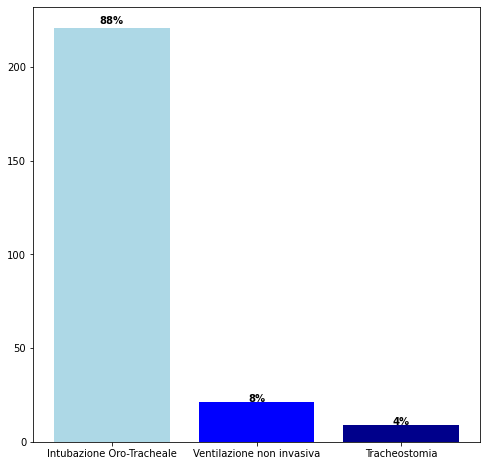

In [134]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['lightblue','blue','darkblue']
graph = plt.bar(interfaccia1.keys(), interfaccia1.values(), color=colors_list)


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round(list( interfaccia1.values())[i] *100 / 251)) + '%',
            ha='center',
            weight='bold') 
    i += 1
plt.show()


i due valori mancanti sono dei seguenti pazienti

In [135]:
no_interfaccia=dati['record_id'].loc[(no_spont['int'].isnull()) & (polmoni['vent']==1.0)]

In [136]:
moda = dict(no_spont['mod_vent'].loc[polmoni['vent']==1.0].value_counts(sort=False))

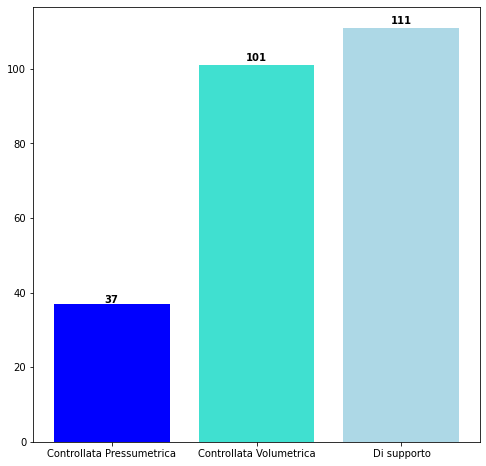

In [137]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['blue','turquoise', 'lightblue']
modality = ['Controllata Pressumetrica','Controllata Volumetrica','Di supporto']
graph = plt.bar(modality, moda.values(), color=colors_list)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            list(moda.values())[i],
            ha='center',
            weight='bold') 
    i += 1
plt.show()

In [138]:
no_spont.groupby(['int','mod_vent']).count()

td_desid  td_impost  tidal_vol  fr  vt  peep_mmhg  p_picco  \
int mod_vent                                                               
1.0 1.0             77         77         86  93  85         96       75   
    2.0             92         91         97  97  96         96       45   
    3.0             19         19         18  22  18         23       15   
2.0 3.0              7          7          6   7   6          8        4   
3.0 1.0              4          4          5   5   5          5        5   
    2.0             11         11         10  10   9         10        4   
    3.0              4          4          5   5   5          5        4   

              p_media_v_aeree  p_plateau  comp  
int mod_vent                                    
1.0 1.0                    36         27    26  
    2.0                    16         37    28  
    3.0                    10          6     5  
2.0 3.0                     2          0     0  
3.0 1.0                     2          2     3  
    2.0                     1          2     3  
    3.0                     3          3     1

In [139]:
no_mod_vent=(dati['record_id'].loc[(polmoni['vent']==1) & (no_spont['mod_vent'].isnull())])

Si potrebbe vedere se c'è una qualche interazione tra le interfacce e le modalità, analizziamo

In [140]:
interfaccia_modalita = dict((no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0)]).value_counts())

In [141]:
no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0) & (polmoni['int'].isnull() | polmoni['mod_vent'].isnull())]

,int,mod_vent
197,1.0,NaN
286,1.0,NaN


In [142]:
interfaccia_modalita

{(1.0, 2.0): 100,
 (1.0, 1.0): 96,
 (1.0, 3.0): 23,
 (3.0, 2.0): 11,
 (2.0, 3.0): 9,
 (3.0, 1.0): 5,
 (3.0, 3.0): 5}

In [143]:
no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0)].var()

int         0.330550
mod_vent    0.490122
dtype: float64

In [144]:
no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0)].corr()

,int,mod_vent
int,1.000000,0.220704
mod_vent,0.220704,1.000000


Non c'è un'elevata correlazione e neanche un'elevata varianza dei dati, ma era facilmente sospettabile.

In [145]:
no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 286
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   int       251 non-null    float64
 1   mod_vent  249 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [146]:
no_spont[['int','mod_vent']].loc[(polmoni['vent'] == 1.0)].describe()

,int,mod_vent
count,251.000000,249.000000
mean,1.203187,1.742972
std,0.574935,0.700087
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,3.000000,3.000000


In [147]:
polmoni.loc[polmoni['vent']==1.0]

,vent,avv_vent,int,mod_vent,td_desid,td_impost,tidal_vol,fr,vt,peep_mmhg,...,lact_mg_mmol_conver,lact_mmol,lact_mmol_mg_conver,na,k,mg,p,bicarb,be,hct
0,1.0,2021-05-17,1.0,3.0,6.0,356.0142,341.0,22.0,7502.0,12.0,...,NaN,0.6,5.4054,135.0,4.0,NaN,NaN,28.5,4.0,27.0
1,1.0,2021-02-07,2.0,3.0,6.0,404.8248,400.0,26.0,10400.0,10.0,...,NaN,2.0,18.0180,144.0,3.8,NaN,NaN,29.6,NaN,45.0
3,1.0,2020-12-30,1.0,1.0,6.0,404.8248,450.0,29.0,13050.0,11.0,...,NaN,1.6,14.4144,136.0,2.9,NaN,NaN,25.5,NaN,39.0
4,1.0,2020-12-29,1.0,1.0,6.0,388.5546,500.0,28.0,14000.0,12.0,...,NaN,0.7,6.3063,140.0,4.2,NaN,NaN,35.5,NaN,37.0
6,1.0,2021-01-06,2.0,3.0,6.0,356.1312,500.0,28.0,14000.0,12.0,...,NaN,1.9,17.1171,NaN,139.0,4.20,NaN,22.3,NaN,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.0,2022-10-22,1.0,2.0,7.0,529.2413,500.0,20.0,10000.0,16.0,...,NaN,9.9,89.1891,140.0,4.2,4.05,NaN,21.9,-6.3,28.0
283,1.0,2022-11-26,1.0,2.0,6.0,448.2120,520.0,24.0,12480.0,8.0,...,NaN,13.4,120.7206,146.0,4.1,NaN,NaN,17.1,-11.4,27.0
284,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.2,55.8558,131.0,6.6,2.50,3.62,10.0,-18.8,42.0
285,1.0,2022-12-27,1.0,2.0,NaN,NaN,520.0,18.0,9360.0,8.0,...,NaN,3.6,32.4324,133.0,3.8,1.07,NaN,19.2,-8.8,37.0


In [148]:
tidal_miss=np.array(dati[['record_id','td_desid','td_impost','tidal_vol']].loc[(dati['vent']==1.0) & (dati['td_desid'].isnull()|dati['td_impost'].isnull() | dati['tidal_vol'].isnull())])

In [149]:
tidal = pd.DataFrame(polmoni[['td_desid','td_impost','tidal_vol']].loc[polmoni['vent']==1.0])

In [150]:
tidal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 286
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   td_desid   215 non-null    float64
 1   td_impost  214 non-null    float64
 2   tidal_vol  228 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


Ci sono due dati che hanno il valore del tidal da impostare nettamente superiore alla media infatti escludendo questi si ottengono risultati differenti, sia sulla deviazione standard che sui restanti parametri, pertanto la domanda che viene è " Sono normale valori così alti?"

In [151]:
dati[['redcap_data_access_group','td_impost']].loc[(dati['td_impost'] > 10000)]

,redcap_data_access_group,td_impost
119,torino_osp_maria_v,19041.800
255,esine_bs_presidio,23049.045


In [152]:
tidal.loc[tidal['td_impost'] < 1000].describe()

,td_desid,td_impost,tidal_vol
count,212.000000,212.000000,206.000000
mean,6.812736,445.683094,489.441748
std,1.134248,95.090859,84.368784
min,4.000000,172.340000,300.000000
25%,6.000000,393.978000,440.000000
50%,7.000000,448.212000,500.000000
75%,8.000000,522.914000,547.500000
max,10.000000,747.020000,910.000000


In [153]:
tidal.describe()

,td_desid,td_impost,tidal_vol
count,215.000000,214.000000,228.000000
mean,10.708372,638.204023,491.929825
std,40.327005,1998.477931,88.756482
min,4.000000,172.340000,191.000000
25%,6.000000,393.978000,447.500000
50%,7.000000,448.212000,500.000000
75%,8.000000,522.914000,550.000000
max,450.000000,23049.045000,910.000000


In [154]:
tidal.corr()

,td_desid,td_impost,tidal_vol
td_desid,1.000000,0.998787,0.023468
td_impost,0.998787,1.000000,0.044234
tidal_vol,0.023468,0.044234,1.000000


Si registra una correlazione molto alta tra tidal desiderata e quella consigliata da impostare, mentre tale correlazione diminuisce quando si mette in relazione la tidal impostata con le altre due misurazioni.

In [155]:
tidal.var()

td_desid     1.626267e+03
td_impost    3.993914e+06
tidal_vol    7.877713e+03
dtype: float64

In [156]:
err = tidal[['tidal_vol','td_impost']].copy()

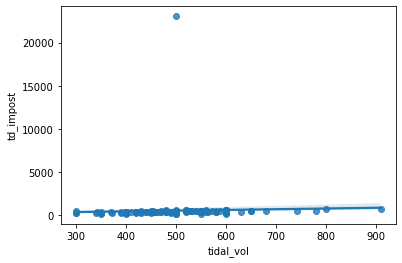

In [157]:
sns.regplot(data=err, x='tidal_vol', y='td_impost')
plt.show()

In [158]:
err['diff'] = err['tidal_vol'] - err['td_impost']
err

,tidal_vol,td_impost,diff
0,341.0,356.0142,-15.0142
1,400.0,404.8248,-4.8248
3,450.0,404.8248,45.1752
4,500.0,388.5546,111.4454
6,500.0,356.1312,143.8688
...,...,...,...
281,500.0,529.2413,-29.2413
283,520.0,448.2120,71.7880
284,NaN,NaN,NaN
285,520.0,NaN,NaN


In [159]:
err['diff'].mean()

-63.22498444444448

In [160]:
err['diff'].median()

31.995499999999993

In [161]:
err.loc[err.notnull().all(axis=1)]

,tidal_vol,td_impost,diff
0,341.0,356.0142,-15.0142
1,400.0,404.8248,-4.8248
3,450.0,404.8248,45.1752
4,500.0,388.5546,111.4454
6,500.0,356.1312,143.8688
...,...,...,...
279,480.0,597.6160,-117.6160
280,450.0,448.2120,1.7880
281,500.0,529.2413,-29.2413
283,520.0,448.2120,71.7880


In [162]:
err.loc[err.notnull().all(axis=1)].to_csv('Dati da segnalare/differenza_tidal.csv')

In [163]:
err.describe()

,tidal_vol,td_impost,diff
count,228.000000,214.000000,207.000000
mean,491.929825,638.204023,-63.224984
std,88.756482,1998.477931,1572.577810
min,191.000000,172.340000,-22549.045000
25%,447.500000,393.978000,1.788000
50%,500.000000,448.212000,31.995500
75%,550.000000,522.914000,83.008000
max,910.000000,23049.045000,391.504000


In [164]:
tidal['tidal_vol']

0      341.0
1      400.0
3      450.0
4      500.0
6      500.0
       ...  
281    500.0
283    520.0
284      NaN
285    520.0
286    500.0
Name: tidal_vol, Length: 251, dtype: float64

ritengo che tra le tre feature quella che potrebbe risultare più interessante analizzare è proprio la tidal effettivamente impostata, che poi è quella effettivamente usata anche nel calcolo del volume corrente (vt)

In [165]:
volume = no_spont[['tidal_vol','fr','vt']].loc[dati['vent'] ==1]

In [166]:
volume.loc[(volume['vt'].isnull())&(volume['fr'].notnull())].shape

(15, 3)

In [167]:
volume.loc[(volume['vt'].isnull())&(volume['tidal_vol'].notnull())].shape

(3, 3)

In [168]:
miss_volume=np.array(dati[['record_id']].loc[(dati['vent'] == 1) & dati['fr'].isnull()] )

I pazienti per cui non è conosciuta la situazione del volume corrente, che è il risultato del prodotto tra tidal impostato e frequenza respiratoria sono 55, ma per 28 di loro è conosciuta la frequenza mentre su due è conosciuta il tidal impostato. 

In [169]:
volume.describe()

,tidal_vol,fr,vt
count,228.000000,240.000000,225.000000
mean,491.929825,19.366667,9223.857778
std,88.756482,7.726424,2754.115882
min,191.000000,5.000000,955.000000
25%,447.500000,14.750000,7200.000000
50%,500.000000,18.000000,8880.000000
75%,550.000000,22.000000,11000.000000
max,910.000000,100.000000,19250.000000


In [170]:
value = np.unique(volume['vt'])

Scatterplot delle correlazione tra le diverse componenti nella diafonae  e della distribuzione 

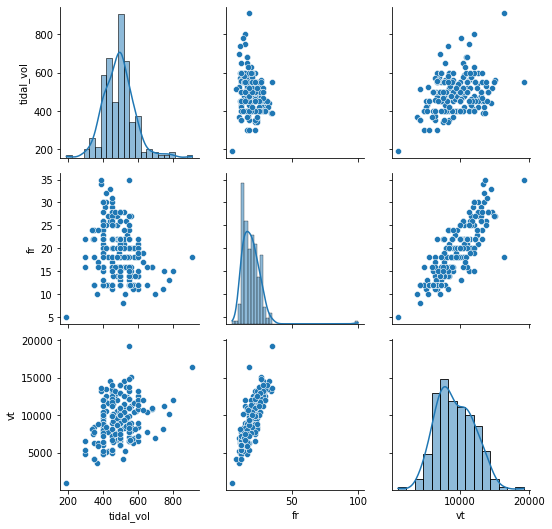

In [171]:
g = sns.PairGrid(volume)
g.map_diag(sns.histplot,kde=True)
g.map_offdiag(sns.scatterplot)


In [172]:
volume.corr()

,tidal_vol,fr,vt
tidal_vol,1.000000,-0.232649,0.307243
fr,-0.232649,1.000000,0.839475
vt,0.307243,0.839475,1.000000


C'è una correlazione negativa tra la frequenza respiratoria e il valore impostato di tidal, mentre c'è una correlazione molto alta tra frequanza ed il volume corrente, ma questa relazione così alta non si ritrova invece tra volume corrente e tidal, nonostante il tidal risulti essere una metrica nella misurazione del volume.

In [173]:
volume.var()

tidal_vol    7.877713e+03
fr           5.969763e+01
vt           7.585154e+06
dtype: float64

In [174]:
def recupero_24h(df,column,column12h,column24h):
    indici_12h=df.loc[(df[column].isnull()) & (df[column12h].notnull())].index
    df[column].loc[indici_12h] = df[column].loc[indici_12h].fillna(df[column12h])
    
    indici_24h=df.loc[(df[column].isnull()) & (dati[column24h].notnull())].index
    df[column].loc[indici_24h] = df[column].loc[indici_24h].fillna(df[column24h])
    return df[column]


In [175]:
dati['peep_mmhg'] = recupero_24h(dati,'peep_mmhg','peep_mmhg_foll_12h','peep_mmhg_foll_24h')

dati['p_picco'] = recupero_24h(dati,'p_picco','p_picco_foll_12h','p_picco_foll_24h')

dati['p_media_v_aeree'] = recupero_24h(dati,'p_media_v_aeree','p_media_v_aeree_foll_12h', 'p_media_v_aeree_foll_24h')

dati['p_plateau'] = recupero_24h(dati,'p_plateau','p_plateau_foll_12h','p_plateau_foll_24h')

dati['comp'] = recupero_24h(dati,'comp','comp_foll_24h','comp_foll_24h')

In [176]:
dati['comp'] = dati['comp'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)

In [177]:
compliance = dati[no_spont.columns[no_spont.columns.get_loc('peep_mmhg'):]].loc[dati['vent'] == 1]

In [178]:
compliance.dtypes

peep_mmhg          float64
p_picco            float64
p_media_v_aeree    float64
p_plateau          float64
comp               float64
dtype: object

È coerente pensare in maniera separata la compliance rispetto a peep e pressione di picco ecc che invece registrano alte correlazioni

In [179]:
dati['comp'].describe()

count     76.000000
mean      47.210526
std       28.921921
min       15.500000
25%       32.375000
50%       42.000000
75%       53.500000
max      200.000000
Name: comp, dtype: float64

In [180]:
compliance.var()

peep_mmhg           17.794632
p_picco             45.974064
p_media_v_aeree     33.479316
p_plateau           44.051061
comp               528.107117
dtype: float64

In [181]:
pressione = compliance[compliance.columns[:-1]]

In [182]:
pressione.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 286
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   peep_mmhg        248 non-null    float64
 1   p_picco          164 non-null    float64
 2   p_media_v_aeree  89 non-null     float64
 3   p_plateau        84 non-null     float64
dtypes: float64(4)
memory usage: 9.8 KB


Sia la pressione media che il plateau hanno un sacco di entrate nulle


In [183]:
pressione.corr()

,peep_mmhg,p_picco,p_media_v_aeree,p_plateau
peep_mmhg,1.000000,0.450903,0.646682,0.494849
p_picco,0.450903,1.000000,0.670044,0.426574
p_media_v_aeree,0.646682,0.670044,1.000000,0.357411
p_plateau,0.494849,0.426574,0.357411,1.000000


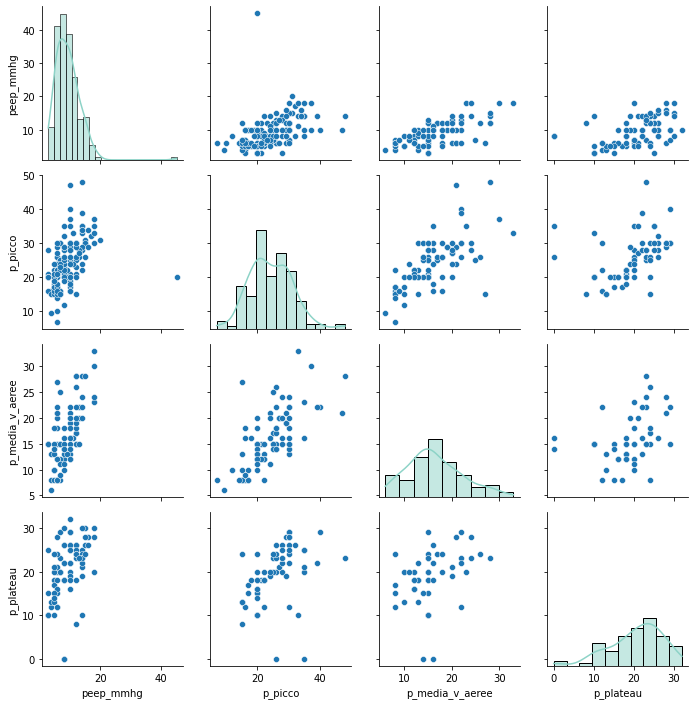

In [184]:
g = sns.PairGrid(pressione)
pal=sns.set_palette("Set3")
g.map_diag(sns.histplot,kde=True)
g.map_offdiag(sns.scatterplot)

plt.show()

In [185]:
pressione.describe()

,peep_mmhg,p_picco,p_media_v_aeree,p_plateau
count,248.000000,164.000000,89.000000,84.000000
mean,9.395161,24.325610,16.471910,20.595238
std,4.218368,6.780418,5.786131,6.637097
min,3.000000,7.000000,6.000000,0.000000
25%,6.000000,20.000000,13.000000,17.750000
50%,8.500000,24.000000,15.000000,22.000000
75%,12.000000,29.000000,20.000000,25.000000
max,45.000000,48.000000,33.000000,32.000000


In [186]:
indici=pressione.loc[pressione.isnull().any(axis=1)].index

In [187]:
pressione_miss = np.array(dati[['record_id','p_picco','p_media_v_aeree','p_plateau']].iloc[indici])

Poichè però il valore più significativo è quello della PeeP viene creato un ulteriore elenco contenente solo i valori mancanti della peep

In [188]:
indici_peep=pressione.loc[pressione['peep_mmhg'].isnull()].index

In [189]:
peep_miss = list(dati['record_id'].iloc[indici_peep])

In [190]:
index_comp = compliance.loc[compliance['comp'].notnull()].index

In [191]:
index_comp_null = compliance.loc[compliance['comp'].isnull()].index

In [192]:
dati['comp'].mean()

47.21052631578947

<AxesSubplot:ylabel='Density'>

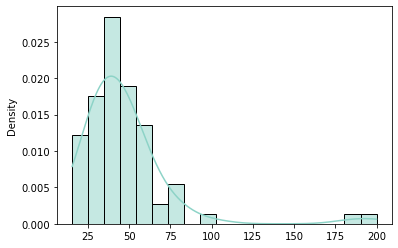

In [193]:
sns.histplot(np.array(dati['comp']),stat='density',kde=True)

In [194]:
no_compliance = list(dati['record_id'].iloc[index_comp])

In [195]:
with open('Dati da segnalare/respirazione_indotta_miss.txt', 'w') as f:
    f.write('Pazienti per cui non risulta registrata la respirazione: ')
    f.write('\n')
    f.write('\n')
    for resp in no_resp:
        f.write(resp)
        f.write('\n')
    
    f.write('\n')
    f.write('Pazienti a cui viene usata ventilazione, per cui non risulta registrata la data di avvio : \n')
    f.write('\n')
    for dat in no_date:
        f.write(dat)
        f.write('\n')
    
    f.write('\n')
    f.write('Pazienti a cui viene usata ventilazione, per cui non risulta segnalato il tipo di interfaccia  : ')
    f.write('\n')
    for inter in no_interfaccia:
        f.write(inter)
        f.write('\n')
        
    f.write('\n')
    f.write('Pazienti a cui viene usata ventilazione, per cui non risulta segnalata la modalità  : \n')
    f.write('\n')
    for mod in no_mod_vent:
        f.write(mod)
        f.write('\n')
        
    f.write('\n')
    f.write('A seguire vengono elencati tutti quei pazienti a cui risulta mancante uno o più valori del tidal (rispettivamente: valore desiderato, da impostare e impostato) : \n')
    f.write('\n')
    f.write('(record_id, td_desid , td_impost , tidal_vol) \n')   
    f.write('\n')
    for tid in tidal_miss:
        f.write(str(tid))
        f.write('\n')
        
    f.write('\n')
    f.write('A seguire vengono elencati tutti quei pazienti a cui risulta mancante la frequenza, poichè il tidal è riportato già in precedenza, mentre l\' assenza di volume risulta vincolata dagli altri due : \n')
    f.write('\n')
    for volum in miss_volume:
        f.write(str(volum))
        f.write('\n')
        
    f.write('\n')
    f.write('A seguire vengono elencati tutti quei pazienti a cui risulta mancante uno o più valori tra i differenti valori della pressione: \n')
    f.write('\n')
    f.write('(record_id,p_picco,p_media_v_aeree,p_plateau) \n')   
    f.write('\n')
    for press in pressione_miss:
        f.write(str(press))
        f.write('\n')
                
    f.write('\n')
    f.write('Poichè i valori della PeeP sono quelli che hanno un impatto più significativo tra quelli pressori, vengono indicati separatamente gli id di quei pazienti che mostrano mancanti i dati del PeeP :\n')
    f.write('\n')
    for peep in peep_miss:
        f.write(str(peep))
        f.write('\n')
                       
    f.write('\n')
    f.write('Record per cui risulta mancante la Compliance :\n')
    f.write('\n')
    for comp in no_compliance:
        f.write(str(comp))
        f.write('\n')

In [196]:
miss_flusso = list(dati['record_id'].loc[(dati['vent'] == 0) & (dati['flusso'].isnull())])

In [197]:
resp_index=polmoni.columns.get_loc('flusso')

In [198]:
respirazione = polmoni[polmoni.columns[resp_index+1:]]

In [199]:
#FiO2
respirazione['fio2'] = recupero_24h(dati,'fio2','fio2_foll_12h','fio2_foll_24h')
mancanti_fio2 = list(dati['record_id'].loc[dati['fio2'].isnull()])

#PaO2
respirazione['pao2'] = recupero_24h(dati,'pao2','pao2_foll_12h','pao2_foll_24h')
mancanti_pao2 = list(dati['record_id'].loc[dati['pao2'].isnull()])

#Horowitz
respirazione['horowitz'] = recupero_24h(dati,'horowitz','horowitz_foll_12h','horowitz_foll_24h')
#no mancanti perchè valore dipende dipendente da altri valori, infatti risultano mancanti i valori che non sono recuperabili.

#SaO2
respirazione['sao2'] = recupero_24h(dati,'sao2','sao2_foll_12h','sao2_foll_24h')
mancanti_sao2 = list(dati['record_id'].loc[dati['sao2'].isnull()])

#PaCO2
respirazione['paco2'] = recupero_24h(dati,'paco2','paco2_foll_12h','paco2_foll_24h')
mancanti_paco2 = list(dati['record_id'].loc[dati['paco2'].isnull()])

#A_AO2
respirazione['a_ao2'] = recupero_24h(dati,'a_ao2','a_ao2_foll_12h','a_ao2_foll_24h')
#no mancanti perchè valore dipende dipendente da altri valori, infatti risultano mancanti i valori che non sono recuperabili.

#PH
respirazione['ph'] = recupero_24h(dati,'ph','ph_foll_12h','ph_foll_24h')
mancanti_ph = list(dati['record_id'].loc[dati['ph'].isnull()])

#Na
respirazione['na'] = recupero_24h(dati,'na','na_foll_12h','na_foll_24h')
mancanti_na = list(dati['record_id'].loc[dati['na'].isnull()])

#K
respirazione['k'] = recupero_24h(dati,'k','k_foll_12h','k_foll_24h')
mancanti_k = list(dati['record_id'].loc[dati['k'].isnull()])

#Mg
respirazione['mg'] = recupero_24h(dati,'mg','mg_foll_12h','mg_foll_24h')
mancanti_mg = list(dati['record_id'].loc[dati['mg'].isnull()])

#P
respirazione['p'] = recupero_24h(dati,'p','p_foll_12h','p_foll_24h')
mancanti_p = list(dati['record_id'].loc[dati['p'].isnull()])

#Bicarbonati
respirazione['bicarb'] = recupero_24h(dati,'bicarb','bicarb_foll_12h','bicarb_foll_24h')

#BE
respirazione['be'] = recupero_24h(dati,'be','be_foll_12h','be_foll_24h')

#HCT
respirazione['hct'] = recupero_24h(dati,'hct','hct_foll_12h','hct_foll_24h')
mancanti_hct = list(dati['record_id'].loc[dati['hct'].isnull()])

In [200]:
for column in respirazione.columns:
    respirazione[column] = dati[column].astype(str).apply(lambda x: x.replace(',','.')).astype(float)
    dati[column] = respirazione[column]

In [201]:
respirazione[['fio2','pao2','horowitz']].describe()

,fio2,pao2,horowitz
count,285.000000,283.000000,283.000000
mean,63.835088,98.710141,177.528938
std,20.416202,39.248671,98.707329
min,21.000000,36.000000,36.000000
25%,50.000000,72.300000,103.357143
50%,60.000000,90.000000,150.000000
75%,80.000000,115.000000,231.857143
max,100.000000,264.000000,571.428571


In [202]:
respirazione['horowitz'].median()

150.0

La mediana supera notevolmente il valore di 100, che è il valore sotto il quale l'horowitz risulta pessimo, quindi almeno la metà dei pazienti analizzati hanno valori superiori a 153. Anche la media è molto alta, ma questo valore potrebbe essere sbilanciato a causa dell'altissimo valore massimo che è 28514, che risulta di molto sopra.Analizzando la distribuzione delle misurazioni si può vedere però come il numero di valori inferiori al 100 sia inferiore della metà infatti sono 51 su 262 i pazienti con valori pessimi, che rappresentano meno di un quarto dei campioni totali. Per finire ci sono 4 pazienti per cui risulta il valore di molto sopra la media, ed analizzando i campioni per tutti risultano valori di fio2 bassissimi, potrebbe esserci un errore sulla memorizzazione dei dati?

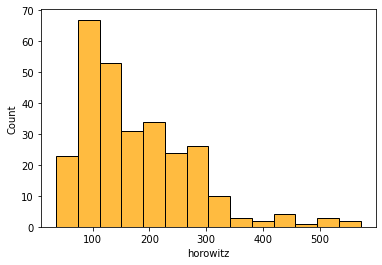

In [203]:
sns.histplot(respirazione['horowitz'],color='orange' )
plt.show()

In [204]:
dati[['record_id','horowitz']].shape[0]

287

In [205]:
horowitz_strange = np.array(dati[['record_id','fio2','pao2','horowitz']])

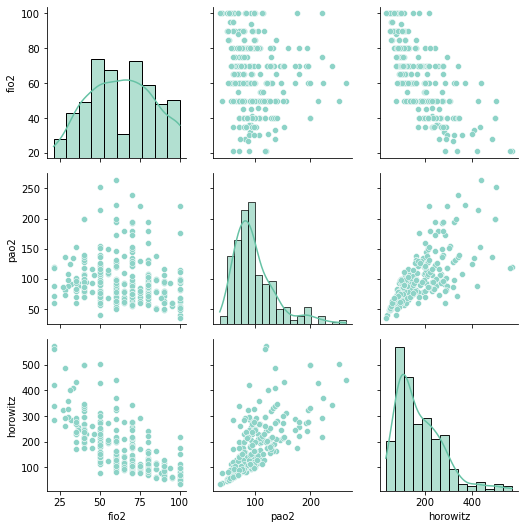

In [206]:
g = sns.PairGrid(respirazione[['fio2', 'pao2' , 'horowitz']])
pal=sns.set_palette("Set2")
g.map_diag(sns.histplot,kde=True)
g.map_offdiag(sns.scatterplot)

plt.show()

In [207]:
respirazione[['fio2', 'pao2' , 'horowitz']].corr()

,fio2,pao2,horowitz
fio2,1.000000,-0.131152,-0.708048
pao2,-0.131152,1.000000,0.693720
horowitz,-0.708048,0.693720,1.000000


In [208]:
respirazione['sao2'].mean()

95.36408450704226

In [209]:
respirazione['sao2'].median()

96.0

In [210]:
respirazione[['fio2', 'pao2' , 'horowitz', 'sao2', 'paco2', 'a_ao2' ]].corr()

,fio2,pao2,horowitz,sao2,paco2,a_ao2
fio2,1.000000,-0.131152,-0.708048,-0.244960,0.407131,0.959117
pao2,-0.131152,1.000000,0.693720,0.260659,-0.184021,-0.375958
horowitz,-0.708048,0.693720,1.000000,0.299624,-0.415373,-0.830367
sao2,-0.244960,0.260659,0.299624,1.000000,-0.167677,-0.291133
paco2,0.407131,-0.184021,-0.415373,-0.167677,1.000000,0.341625
a_ao2,0.959117,-0.375958,-0.830367,-0.291133,0.341625,1.000000


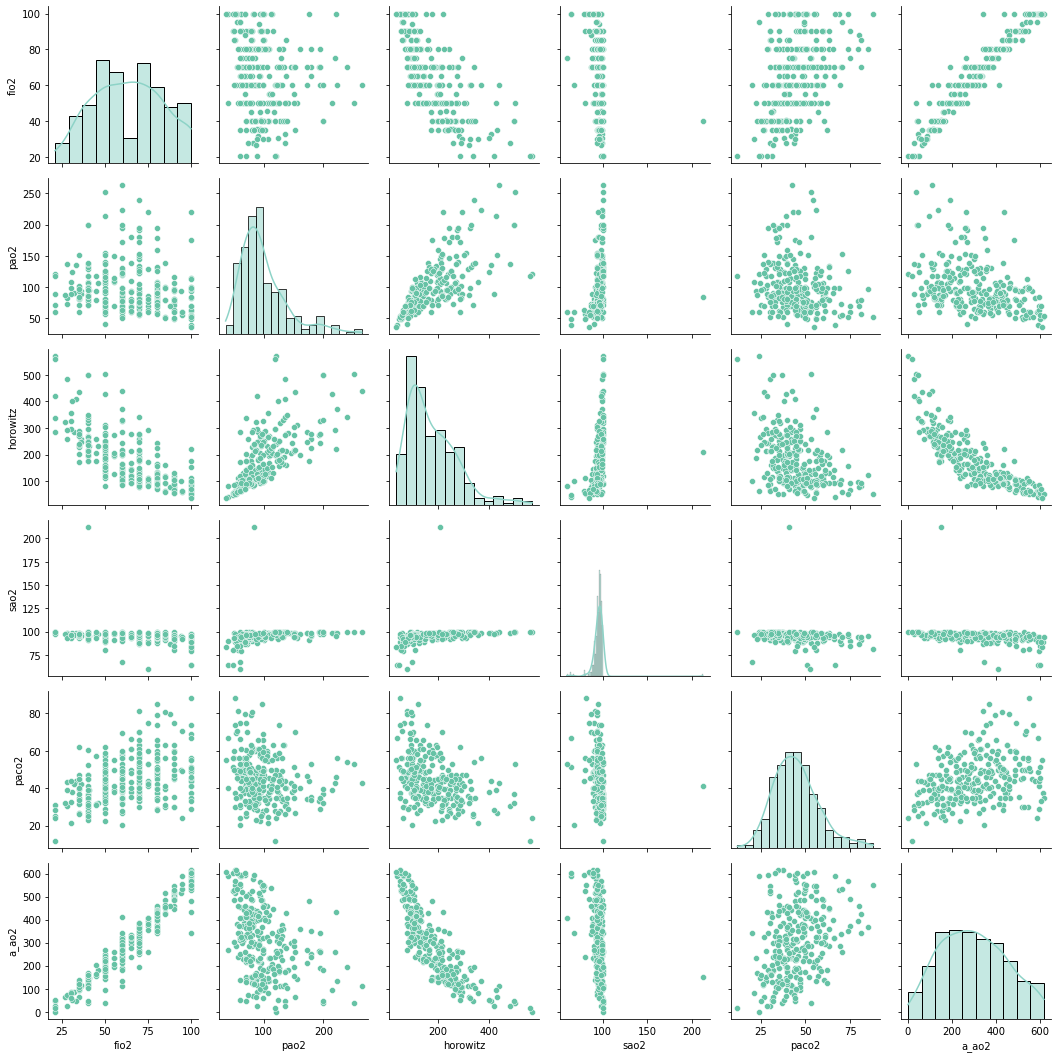

In [211]:
g = sns.PairGrid(respirazione[['fio2', 'pao2' , 'horowitz', 'sao2', 'paco2', 'a_ao2' ]])
pal=sns.set_palette("Set3")
g.map_diag(sns.histplot,kde=True)
g.map_offdiag(sns.scatterplot)

plt.show()

In [212]:
respirazione['ph'].describe()

count    283.000000
mean       7.417728
std        1.648815
min        6.900000
25%        7.250000
50%        7.320000
75%        7.400000
max       35.000000
Name: ph, dtype: float64

In [213]:
respirazione['ph'].loc[(dati['vent'] ==0) & (respirazione['ph'].notnull())].describe()


count    32.000000
mean      7.351063
std       0.077344
min       7.210000
25%       7.300000
50%       7.345000
75%       7.410000
max       7.518000
Name: ph, dtype: float64

In [214]:
respirazione['ph'].loc[(dati['vent'] ==1) & (respirazione['ph'].notnull())].describe()



count    249.000000
mean       7.427241
std        1.757775
min        6.900000
25%        7.250000
50%        7.320000
75%        7.400000
max       35.000000
Name: ph, dtype: float64

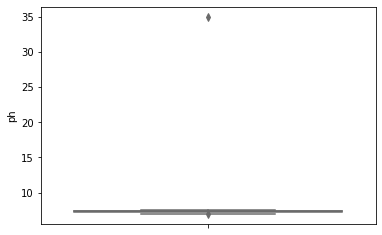

In [215]:
sns.boxplot(y=respirazione['ph'], orient='o')
plt.show()

In [216]:
misura_lact = respirazione.columns.get_loc('misura_lact')


In [217]:
lact_mmol_mg_conver = respirazione.columns.get_loc('lact_mmol_mg_conver')

In [218]:
lattati_tempo0 = respirazione[respirazione.columns[misura_lact:lact_mmol_mg_conver+1]]

In [219]:
lattati_tempo0['misura_lact'].value_counts(dropna=False)

1.0    264
2.0     18
NaN      5
Name: misura_lact, dtype: int64

In [220]:
lattati_tempo0.loc[lattati_tempo0['misura_lact']==1]

,misura_lact,lact_mg,lact_mg_mmol_conver,lact_mmol,lact_mmol_mg_conver
0,1.0,NaN,NaN,0.6,5.4054
1,1.0,NaN,NaN,2.0,18.0180
2,1.0,NaN,NaN,2.4,21.6216
3,1.0,NaN,NaN,1.6,14.4144
4,1.0,NaN,NaN,0.7,6.3063
...,...,...,...,...,...
282,1.0,NaN,NaN,13.4,120.7206
283,1.0,NaN,NaN,13.4,120.7206
284,1.0,NaN,NaN,6.2,55.8558
285,1.0,NaN,NaN,3.6,32.4324


In [221]:
lattati_tempo0=lattati_tempo0.fillna(0.0)

In [222]:
lattati_tempo0['lattati'] = lattati_tempo0['lact_mg_mmol_conver'] + lattati_tempo0['lact_mmol']

In [223]:
lattati_tempo0.replace(0.0,np.nan,inplace=True)

In [224]:
respirazione.insert(loc=misura_lact, column='lattati', value = lattati_tempo0['lattati'])

In [225]:
misura_lact_dati = dati.columns.get_loc('misura_lact')

In [226]:
dati.insert(loc=misura_lact_dati, column='lattati', value = respirazione['lattati'])

In [227]:
dati.drop(columns=['misura_lact','lact_mg','lact_mg_mmol_conver','lact_mmol','lact_mmol_mg_conver'],inplace=True)

In [228]:
respirazione.drop(columns=['misura_lact','lact_mg','lact_mg_mmol_conver','lact_mmol','lact_mmol_mg_conver'],inplace=True)

In [229]:
mancanti_lattati_t0 = list(dati['record_id'].loc[dati['lattati'].isnull()])

In [230]:
prova = lattati_tempo0.loc[(lattati_tempo0['misura_lact'].isnull()) & (lattati_tempo0['lattati'].isnull())].index

In [231]:
dati[['lact_mmol_foll_12h','lact_mmol_foll_24h','lact_mg_foll_12h','lact_mg_foll_12h']].iloc[prova]

,lact_mmol_foll_12h,lact_mmol_foll_24h,lact_mg_foll_12h,lact_mg_foll_12h
188,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN
274,NaN,NaN,NaN,NaN


In [232]:
respirazione['lattati'].describe()

count    280.000000
mean       3.402871
std        3.557188
min        0.055500
25%        1.307500
50%        2.005000
75%        3.617500
max       18.000000
Name: lattati, dtype: float64

In [233]:
respirazione.columns

Index(['fio2', 'pao2', 'horowitz', 'sao2', 'paco2', 'a_ao2', 'ph', 'lattati',
       'na', 'k', 'mg', 'p', 'bicarb', 'be', 'hct'],
      dtype='object')

In [234]:
respirazione[[ 'na', 'k', 'mg', 'p']].corr()

,na,k,mg,p
na,1.000000,-0.010699,0.094518,0.007882
k,-0.010699,1.000000,0.010101,0.341011
mg,0.094518,0.010101,1.000000,0.282469
p,0.007882,0.341011,0.282469,1.000000


In [235]:
respirazione[[ 'na', 'k', 'mg', 'p']].describe()

,na,k,mg,p
count,285.000000,284.000000,195.000000,162.000000
mean,139.023158,4.803310,2.808615,4.476605
std,6.538991,8.036631,8.385647,2.261342
min,118.000000,2.100000,0.840000,0.500000
25%,135.000000,3.800000,1.800000,3.000000
50%,138.000000,4.100000,2.100000,4.000000
75%,143.000000,4.700000,2.500000,5.360000
max,167.000000,139.000000,119.000000,12.700000


In [236]:
respirazione[['bicarb', 'be']].corr()

,bicarb,be
bicarb,1.000000,0.860557
be,0.860557,1.000000


In [237]:
respirazione['bicarb']=respirazione['bicarb'].fillna(respirazione['be'] + 24.0 )

In [238]:
respirazione['be'] = respirazione['be'].fillna(respirazione['bicarb'] - 24.0)

In [239]:
dati['bicarb'] = respirazione['bicarb']
dati['be'] = respirazione['be']


In [240]:
mancanti_bica_beri = list(dati['record_id'].loc[dati['be'].isnull()])

In [241]:
respirazione[['bicarb','be']].describe()

,bicarb,be
count,282.000000,282.000000
mean,22.238652,-2.747631
std,4.807560,5.638411
min,5.900000,-23.000000
25%,19.500000,-6.075000
50%,22.000000,-2.700000
75%,25.000000,0.575000
max,38.000000,19.300000


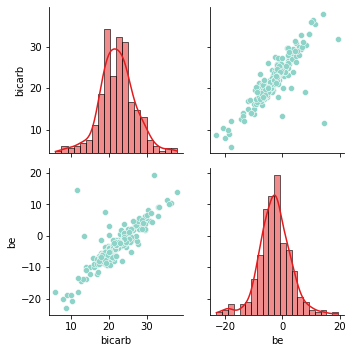

In [242]:
g = sns.PairGrid(respirazione[['bicarb','be']])
pal=sns.set_palette("Set1")
g.map_diag(sns.histplot,kde=True)
g.map_offdiag(sns.scatterplot)

plt.show()

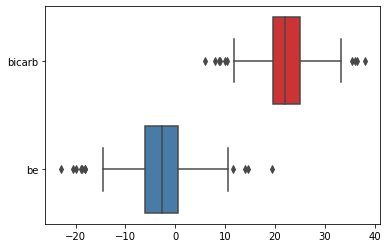

In [243]:
sns.boxplot(data=respirazione[['bicarb','be']],orient='h')
plt.show()

In [244]:
respirazione['hct'] = respirazione['hct'].fillna(30.0)

In [245]:
dati['hct'] = respirazione['hct']

In [246]:
respirazione['hct'].describe()

count    287.000000
mean      31.425436
std        6.593752
min        7.100000
25%       27.400000
50%       30.200000
75%       35.000000
max       58.000000
Name: hct, dtype: float64

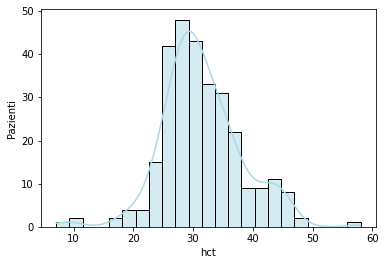

In [247]:
fig, ax1 = plt.subplots()
sp1 = sns.histplot(respirazione['hct'],color='lightblue',kde=True)
ax1.set_xlabel('hct')
ax1.set_ylabel('Pazienti')

plt.show()

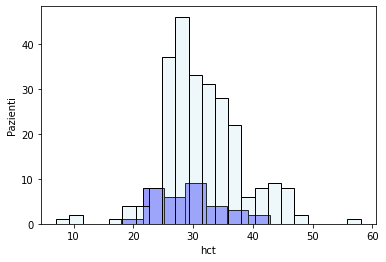

In [248]:
fig, ax1 = plt.subplots()

sp1=sns.histplot(respirazione['hct'].loc[dati['vent']==0],color='blue',alpha=.4)
sp2=sns.histplot(respirazione['hct'].loc[dati['vent']==1],color='lightblue',alpha=.2)
ax1.set_xlabel('hct')
ax1.set_ylabel('Pazienti')


plt.show()

In [249]:
respirazione.corr()

,fio2,pao2,horowitz,sao2,paco2,a_ao2,ph,lattati,na,k,mg,p,bicarb,be,hct
fio2,1.000000,-0.131152,-0.708048,-0.244960,0.407131,0.959117,-0.099758,-0.061503,0.153818,0.015168,0.137419,-0.096648,0.217632,0.114459,0.162528
pao2,-0.131152,1.000000,0.693720,0.260659,-0.184021,-0.375958,0.018124,0.050803,0.094731,-0.054361,0.150539,0.015699,0.081267,0.120383,-0.086596
horowitz,-0.708048,0.693720,1.000000,0.299624,-0.415373,-0.830367,0.087263,0.102652,-0.057832,-0.050875,-0.009145,0.073923,-0.131623,-0.037561,-0.169886
sao2,-0.244960,0.260659,0.299624,1.000000,-0.167677,-0.291133,0.012468,-0.054655,-0.025726,-0.037602,-0.039317,-0.091494,-0.024073,-0.016275,0.090022
paco2,0.407131,-0.184021,-0.415373,-0.167677,1.000000,0.341625,-0.089524,-0.225021,0.048110,-0.020511,0.004629,-0.092838,0.274275,0.136264,0.046120
a_ao2,0.959117,-0.375958,-0.830367,-0.291133,0.341625,1.000000,-0.092335,-0.044669,0.119743,0.031318,0.096536,-0.112295,0.160510,0.064216,0.176500
ph,-0.099758,0.018124,0.087263,0.012468,-0.089524,-0.092335,1.000000,-0.043656,-0.013349,-0.002871,-0.003037,-0.057789,0.036239,0.041490,-0.016326
lattati,-0.061503,0.050803,0.102652,-0.054655,-0.225021,-0.044669,-0.043656,1.000000,0.075535,-0.004732,-0.041480,0.183575,-0.457228,-0.382789,-0.075965
na,0.153818,0.094731,-0.057832,-0.025726,0.048110,0.119743,-0.013349,0.075535,1.000000,-0.010699,0.094518,0.007882,0.147877,0.107422,0.063009
k,0.015168,-0.054361,-0.050875,-0.037602,-0.020511,0.031318,-0.002871,-0.004732,-0.010699,1.000000,0.010101,0.341011,-0.023978,-0.011653,0.058841


In [250]:
"""with open('Dati da segnalare/miss_respirazione.txt', 'w') as f:
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il flusso: \n')
    f.write('\n')
    for flus in miss_flusso:
        f.write(flus)
        f.write('\n')
    
    f.write('\n')    
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di FiO2: \n')
    f.write('\n')
    for f2 in mancanti_fio2:
        f.write(f2)
        f.write('\n')
        
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di PaO2: \n')
    f.write('\n')
    for p2 in mancanti_pao2:
        f.write(p2)
        f.write('\n')
 
        
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di SaO2: \n')
    f.write('\n')
    for s2 in mancanti_sao2:
        f.write(s2)
        f.write('\n')

                
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di PaCO2: \n')
    f.write('\n')
    for pac2 in mancanti_paco2:
        f.write(pac2)
        f.write('\n')

                
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di Ph: \n')
    f.write('\n')
    for p in mancanti_ph:
        f.write(p)
        f.write('\n')
                        
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di Na: \n')
    f.write('\n')
    for n in mancanti_na:
        f.write(n)
        f.write('\n')
                       
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di K: \n')
    f.write('\n')
    for kk in mancanti_k:
        f.write(kk)
        f.write('\n')
        
                        
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di Mg: \n')
    f.write('\n')
    for mmg in mancanti_mg:
        f.write(mmg)
        f.write('\n')
        
        
                            
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di P: \n')
    f.write('\n')
    for pp in mancanti_p:
        f.write(pp)
        f.write('\n')
        
                                    
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di HCT: \n')
    f.write('\n')
    for hct in mancanti_hct:
        f.write(hct)
        f.write('\n')
    
                                        
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore dei lattati: \n')
    f.write('\n')
    for lat in mancanti_lattati_t0:
        f.write(lat)
        f.write('\n')
        
                                                
    f.write('\n')               
    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di bicarbonato e berillio che sono i medesimi: \n')
    f.write('\n')
    for bb in mancanti_bica_beri:
        f.write(bb)
        f.write('\n')
        
    f.write('\n')    
    f.write('Pazienti con respirazione spontanea per cui risultano anomali i valori dell\'horowitz: \n')
    f.write('\n')
    f.write('(record_id , fio2 , pao2 , horowitz) \n')
    for hor in horowitz_strange:
        f.write(str(hor))
        f.write('\n')  
        """

"with open('Dati da segnalare/miss_respirazione.txt', 'w') as f:\n    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il flusso: \n')\n    f.write('\n')\n    for flus in miss_flusso:\n        f.write(flus)\n        f.write('\n')\n    \n    f.write('\n')    \n    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di FiO2: \n')\n    f.write('\n')\n    for f2 in mancanti_fio2:\n        f.write(f2)\n        f.write('\n')\n        \n    f.write('\n')               \n    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di PaO2: \n')\n    f.write('\n')\n    for p2 in mancanti_pao2:\n        f.write(p2)\n        f.write('\n')\n \n        \n    f.write('\n')               \n    f.write('Pazienti con respirazione spontanea per cui non risulta registrato il valore di SaO2: \n')\n    f.write('\n')\n    for s2 in mancanti_sao2:\n        f.write(s2)\n        f.write('\n')\n\n                \n    f.wr

In [251]:
indice_hct = dati.columns.get_loc('hct')

In [252]:
dati[dati.columns[indice_hct+1:]]

,creat_7_365,crea_basale,crea_mdrd,crea,diff_crea,rapp_crea,output_ur,output_ur_24,urea_um,urea_g_l,...,ultrafiltr_totale,rac_cam_out,tip_camp_out___1,tip_camp_out___2,tip_camp_out___3,tip_camp_out___4,tip_camp_al_out,n_camp_out,q_camp_out,outcome_ti_complete
0,0.0,NaN,1.116025,0.88,-0.236025,0.788513,180.00,4340.0,NaN,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
1,0.0,NaN,1.048547,1.10,0.051453,1.049071,59.20,1420.0,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
2,0.0,NaN,1.129050,0.99,-0.139050,0.876844,99.58,2390.0,NaN,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
3,0.0,NaN,1.048547,0.78,-0.268547,0.743886,120.00,2880.0,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,2
4,0.0,NaN,1.035355,2.18,1.144645,2.105557,143.30,3440.0,NaN,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,9.89,1.023199,9.89,0.000000,1.000000,10.00,265.0,2.0,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
283,1.0,0.70,1.043136,2.55,1.850000,3.642857,0.00,NaN,2.0,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
284,0.0,NaN,0.778057,9.06,8.281943,11.644398,0.00,0.0,2.0,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2
285,0.0,NaN,1.181436,3.26,2.078564,2.759353,50.00,NaN,2.0,NaN,...,NaN,0.0,0,0,0,0,NaN,NaN,NaN,2


In [253]:
last = dati.columns.get_loc('hct')
polmoni  =  dati[dati.columns[third:last+1]]

In [254]:
polmoni

,vent,avv_vent,int,mod_vent,td_desid,td_impost,tidal_vol,fr,vt,peep_mmhg,...,a_ao2,ph,lattati,na,k,mg,p,bicarb,be,hct
0,1.0,2021-05-17,1.0,3.0,6.0,356.0142,341.0,22.0,7502.0,12.0,...,510.4175,7.46,0.6,135.0,4.0,NaN,NaN,28.5,4.0,27.0
1,1.0,2021-02-07,2.0,3.0,6.0,404.8248,400.0,26.0,10400.0,10.0,...,613.6025,7.50,2.0,144.0,3.8,NaN,NaN,29.6,5.6,45.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,544.1675,7.42,2.4,141.0,5.2,NaN,NaN,29.2,5.2,42.0
3,1.0,2020-12-30,1.0,1.0,6.0,404.8248,450.0,29.0,13050.0,11.0,...,516.0275,7.59,1.6,136.0,2.9,NaN,NaN,25.5,1.5,39.0
4,1.0,2020-12-29,1.0,1.0,6.0,388.5546,500.0,28.0,14000.0,12.0,...,311.5175,7.48,0.7,140.0,4.2,NaN,NaN,35.5,11.5,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.7300,7.30,13.4,141.0,5.5,0.84,NaN,5.9,-18.0,30.0
283,1.0,2022-11-26,1.0,2.0,6.0,448.2120,520.0,24.0,12480.0,8.0,...,608.2500,7.17,13.4,146.0,4.1,NaN,NaN,17.1,-11.4,27.0
284,1.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,8.0,...,602.7500,7.09,6.2,131.0,6.6,2.50,3.62,10.0,-18.8,42.0
285,1.0,2022-12-27,1.0,2.0,NaN,NaN,520.0,18.0,9360.0,8.0,...,268.5500,7.20,3.6,133.0,3.8,1.07,1.39,19.2,-8.8,37.0


### Reni

In [255]:
start_rene = dati.columns.get_loc('hct')+1

In [256]:
stop_rene = dati.columns.get_loc('nc')+1

In [257]:
reni = dati[dati.columns[start_rene:stop_rene]]

In [258]:
for i in range(reni.shape[1]):
    if reni.columns[i] not in ['diur','diur_2','diur_3']:
        reni[reni.columns[i]] = reni[reni.columns[i]].astype(str).apply(lambda x: x.replace(',','.')).astype(float)



In [259]:
dati[reni.columns] = reni

In [260]:
reni

,creat_7_365,crea_basale,crea_mdrd,crea,diff_crea,rapp_crea,output_ur,output_ur_24,urea_um,urea_g_l,urea_mg_dl,tp_diur,diur,dos,diur_2,dos_2,diur_3,dos_3,nc
0,0.0,NaN,1.116025,0.88,-0.236025,0.788513,180.00,4340.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,1.048547,1.10,0.051453,1.049071,59.20,1420.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,1.129050,0.99,-0.139050,0.876844,99.58,2390.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.048547,0.78,-0.268547,0.743886,120.00,2880.0,NaN,NaN,NaN,1.0,furosemide,40.0,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,1.035355,2.18,1.144645,2.105557,143.30,3440.0,NaN,NaN,NaN,1.0,furosemide,20.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.0,9.89,1.023199,9.89,0.000000,1.000000,10.00,265.0,2.0,NaN,209.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1.0,0.70,1.043136,2.55,1.850000,3.642857,0.00,NaN,2.0,NaN,97.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,0.0,NaN,0.778057,9.06,8.281943,11.644398,0.00,0.0,2.0,NaN,181.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,0.0,NaN,1.181436,3.26,2.078564,2.759353,50.00,NaN,2.0,NaN,87.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
reni.columns

Index(['creat_7_365', 'crea_basale', 'crea_mdrd', 'crea', 'diff_crea',
       'rapp_crea', 'output_ur', 'output_ur_24', 'urea_um', 'urea_g_l',
       'urea_mg_dl', 'tp_diur', 'diur', 'dos', 'diur_2', 'dos_2', 'diur_3',
       'dos_3', 'nc'],
      dtype='object')

In [262]:
reni[['creat_7_365', 'crea_basale', 'crea_mdrd', 'crea', 'diff_crea','rapp_crea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creat_7_365  286 non-null    float64
 1   crea_basale  118 non-null    float64
 2   crea_mdrd    287 non-null    float64
 3   crea         287 non-null    float64
 4   diff_crea    287 non-null    float64
 5   rapp_crea    287 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


In [263]:
reni['creat_7_365'].value_counts(dropna=False)

0.0    168
1.0    118
NaN      1
Name: creat_7_365, dtype: int64

In [264]:
miss_crea_7_365=list(dati['record_id'].loc[(reni['creat_7_365']==1)&(reni['crea_basale'].isnull())])

In [265]:
reni['crea_mdrd'].loc[reni['crea_mdrd'].isnull()]

Series([], Name: crea_mdrd, dtype: float64)

In [266]:
reni['crea_mdrd'].describe()

count    287.000000
mean       0.990576
std        0.114606
min        0.773268
25%        0.868349
50%        1.030377
75%        1.062951
max        1.264853
Name: crea_mdrd, dtype: float64

<AxesSubplot:xlabel='crea_mdrd', ylabel='Count'>

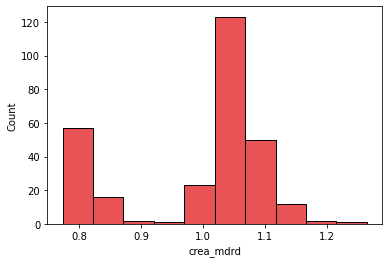

In [267]:
sns.histplot(reni['crea_mdrd'])

In [268]:
crea_basale = reni[['crea_basale','crea_mdrd']].loc[reni['creat_7_365']==1]

In [269]:
crea_basale['differenza'] = crea_basale['crea_basale'] - crea_basale['crea_mdrd']

In [270]:
crea_basale.loc[crea_basale['crea_basale'].isnull()]

,crea_basale,crea_mdrd,differenza


In [271]:
crea_basale['differenza'].describe()

count    118.000000
mean       0.613430
std        1.465892
min       -0.612239
25%       -0.149709
50%        0.107095
75%        0.845737
max        8.866801
Name: differenza, dtype: float64

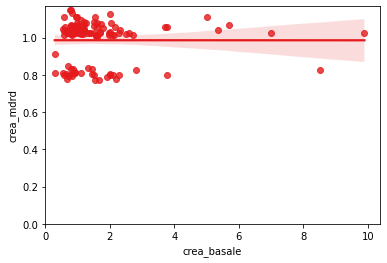

In [272]:
sns.regplot(data=crea_basale, x=crea_basale['crea_basale'].loc[crea_basale['crea_basale'].notnull()], y=crea_basale['crea_mdrd'].loc[crea_basale['crea_basale'].notnull()])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [273]:
x = crea_basale[crea_basale.columns[0:2]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [274]:
mse = mean_squared_error(df[0].loc[df[0].notnull()], df[1].loc[df[0].notnull()])
print(mse)

0.2944143297423677


In [275]:
reni.columns

Index(['creat_7_365', 'crea_basale', 'crea_mdrd', 'crea', 'diff_crea',
       'rapp_crea', 'output_ur', 'output_ur_24', 'urea_um', 'urea_g_l',
       'urea_mg_dl', 'tp_diur', 'diur', 'dos', 'diur_2', 'dos_2', 'diur_3',
       'dos_3', 'nc'],
      dtype='object')

In [276]:
miss_crea = list(dati['record_id'].loc[reni['crea'].isnull()])

In [ ]:
sns.histplot(reni['crea_basale'],color='pink',alpha=.4)
sns.histplot(reni['crea_mdrd'].loc[reni['creat_7_365'] == 1],color='purple')
plt.show()

In [ ]:
sns.histplot(reni['crea_mdrd'],color='blue',alpha=.2)
sns.histplot(reni['crea'],color='orange',alpha=.4)
plt.show()

In [ ]:
reni['crea'].mean()

In [ ]:
reni[['creat_7_365', 'crea_basale', 'crea_mdrd', 'crea', 'diff_crea','rapp_crea']].corr()

In [ ]:
reni[['creat_7_365', 'crea_basale', 'crea_mdrd', 'crea', 'diff_crea','rapp_crea']].describe()

In [ ]:
reni['crea'].mean()

In [ ]:
fig, ax1 = plt.subplots()
sp1 = sns.histplot(reni['crea'],color='blue')
ax1.set_xlabel('Creatinina')
ax1.set_ylabel('Pazienti')
plt.show()

In [ ]:
indici_out = dati[['target','indicaz_terap_renal___1','output_ur', 'output_ur_24']].loc[(dati['output_ur'].isnull()) & (dati['target'] != 2) 
                                                                           & (dati['indicaz_terap_renal___1'] ==1)].index

In [ ]:
dati['output_ur'].iloc[indici_out] = 0.0

In [ ]:
reni['output_ur'].iloc[indici_out] = dati['output_ur'].iloc[indici_out]

In [ ]:
reni['output_ur'].mean()

In [ ]:
dict(reni['output_ur'].value_counts(dropna=False))

In [ ]:
miss_output_uri=list(dati['record_id'].loc[reni['output_ur'].isnull()])

In [ ]:
'''
indici_diur = dati[['indicaz_terap_renal___1','tp_diur','output_ur']].loc[(dati['output_ur']==0.0)
                                                                           & (dati['indicaz_terap_renal___1'] ==1)
                                                           & (dati['tp_diur'].isnull())].index

dati['tp_diur'].iloc[indici_diur] = 1.0

reni['tp_diur'] = dati['tp_diur'].copy()
'''

In [ ]:
reni.columns

In [ ]:
miss_tp_urina = list(dati['record_id'].loc[dati['tp_diur'].isnull()])

Ma è normale per queste persone che hanno un fluidoverlorad ed un output urinario pari a 0.0 che non abbiano una terapia diuretica??

In [ ]:
dati['tp_diur'].value_counts()

In [ ]:
dati.drop(columns=[ 'urea_um', 'urea_g_l',
       'urea_mg_dl','diur', 'dos', 'diur_2', 'dos_2', 'diur_3',
       'dos_3'],inplace = True)

In [ ]:
reni.drop(columns=['diur', 'dos', 'diur_2', 'dos_2', 'diur_3',
       'dos_3'],inplace = True)

In [ ]:
dati.drop(columns=['nc'],inplace=True)

In [ ]:
"""
with open('Dati da segnalare/reni_missing.txt', 'w') as f:
    f.write('Pazienti per cui non risulta registrata la creatinini dei 7/365 giotni precedenti, nonostante venga segnata: ')
    f.write('\n')
    f.write('\n')
    for c7 in miss_crea_7_365:
        f.write(c7)
        f.write('\n')
        
    f.write('Pazienti per cui non risulta registrata la creatinina, questi sono gli pazienti che risultano avere mancante di conseguenza anche rapporto e differenza : ')
    f.write('\n')
    f.write('\n')
    for cr in miss_crea:
        f.write(cr)
        f.write('\n')
        
                
    f.write('Pazienti per cui non risulta registrata l\'output urinario : ')
    f.write('\n')
    f.write('\n')
    for ur in miss_output_uri:
        f.write(cr)
        f.write('\n')
        
                        
    f.write('Pazienti per cui non risulta registrata l\'output della terapia urinaria : ')
    f.write('\n')
    f.write('\n')
    for tu in miss_tp_urina:
        f.write(tu)
        f.write('\n')
        """

### Fegato

In [ ]:
piastrine = dati.columns.get_loc('plt')
sepsi = dati.columns.get_loc('sep')

In [ ]:
dati.drop(columns=dati.columns[piastrine+1:sepsi],inplace=True)

In [ ]:
dati['bil'] = dati['bil'].fillna(dati['bil_foll_12h'])
dati['bil'] = dati['bil'].fillna(dati['bil_foll_24h'])
dati['bil'] = dati['bil'].fillna(dati['bil_foll_2gg'])


In [ ]:
start_fegato = dati.columns.get_loc('bil')
stop_fegato = dati.columns.get_loc('sede_altro')+1

In [ ]:
fegato = dati[dati.columns[start_fegato:stop_fegato]]

In [ ]:
for i in range(fegato.shape[1]):
    if (fegato[fegato.columns[i]].dtypes =='object') & (fegato.columns[i] not in ['ddim','sede_altro']):
        fegato[fegato.columns[i]] = fegato[fegato.columns[i]].astype(str).apply(lambda x: x.replace(',','.')).astype(float)


In [ ]:
dati[fegato.columns] = fegato

Droppo tutti i valori dopo le piastrine fino alla sepsi, li valuto.

In [ ]:
fegato['bil'].mean()

In [ ]:
fegato['bil'].describe()

Ci sono 14 valori nulli sulla billirubina, inizialmente ne erano 28, ma la metà sono statio recuperati dai valori disponibili fino ai 2 giorni successivi (i dati del fegato si possono recuperare fino ai 4 gg successivi). Per i mancanti del fegato li consideriamo normali e perciò 0.8

In [ ]:
miss_bill = list(dati['record_id'].loc[dati['bil'].isnull()])

In [ ]:
dati['bil']=dati['bil'].fillna(0.8)

In [ ]:
fegato['bil'] = dati['bil']

In [ ]:
fegato['bil'].describe()

In [ ]:
sns.boxplot(data=fegato[['bil']],color='lightblue')
plt.show()

In [ ]:
sns.histplot(fegato['bil'],color='green',alpha=.4)
plt.show()

In [ ]:
fegato['alb'].describe()

In [ ]:
fegato['alb'].info()

In [ ]:
fegato['alb'].describe()

In [ ]:
fegato['alb'].median()

In [ ]:
dict(fegato['alb'].value_counts())

In [ ]:
fegato['alb'].mean()

In [ ]:
fig, ax1 = plt.subplots()
sp1 = sns.histplot(fegato['alb'],color='blue')
ax1.set_xlabel('Albumnina')
ax1.set_ylabel('Pazienti')
plt.show()

In [ ]:
fegato['plt'].mean()

In [ ]:
fig, ax1 = plt.subplots()
sp1 = sns.histplot(fegato['plt'],color='lightblue')
ax1.set_xlabel('Piastrine')
ax1.set_ylabel('Pazienti')
plt.show()


In [ ]:
miss_alb = list(dati['record_id'].loc[dati['alb'].isnull()])

In [ ]:
fegato['plt'].info()

In [ ]:
fegato['plt'].describe()

Unico caso con piastrine altissime a migliaia, potrebbe essere un errore??

In [ ]:
fegato['plt'].median()

In [ ]:
sns.histplot(fegato['plt'],color='yellow',alpha=.2)
plt.show()

In [ ]:
sns.boxplot(data=fegato['plt'],color='orange')
plt.show()

Ci sono 22 valori delle piastrine mancanti.

In [ ]:
miss_piastrine=list(dati['record_id'].loc[dati['plt'].isnull()])

In [ ]:
"""with open('Dati da segnalare/fegato_missing.txt', 'w') as f:
    f.write('Pazienti per cui non risulta registrata la bilirubina : ')
    f.write('\n')
    f.write('\n')
    for bb in miss_bill:
        f.write(bb)
        f.write('\n')
        
    f.write('Pazienti per cui non risulta registrata la albumina : ')
    f.write('\n')
    f.write('\n')
    for aa in miss_alb:
        f.write(aa)
        f.write('\n')
        
           
    f.write('Pazienti per cui non risulta registrata le piastrine : ')
    f.write('\n')
    f.write('\n')
    for pp in miss_piastrine:
        f.write(pp)
        f.write('\n') 
   """     

Ci sono 18 pazienti che non avevano segnalata sepsi come target, ma qui risulta accertata. Mentre ci sono 20 pazienti per cui risulta segnalata sepsi in fase di indicazione al trattamento ma qui risulta non presente. Ci sono 4 pazienti per cui invece non viene segnalata sepsi in fase di indicazione, che non hanno dato di sepsi missing

In [ ]:
fegato[['sede___1', 'sede___2', 'sede___3',
       'sede___4', 'sede___5', 'sede___6', 'sede___7', 'sede_altro']].loc[fegato['sep']!=1]

In [ ]:
dati[['target','sep']].loc[dati['sep'].isnull()]


In [ ]:
sepsi = dict(dati['sep'].value_counts())

In [ ]:
sepsi

In [ ]:
dati.shape

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['lightblue','blue','navy']
graph = plt.bar(('accertata','presunta','no'), sepsi.values(), color=colors_list)
plt.title('Presenza di sepsi')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(list(sepsi.values())[i]),
            ha='center',
            weight='bold') 
    i += 1
plt.show()

In [ ]:
fegato.columns

In [ ]:
miss_sepsi = list(dati['record_id'].loc[fegato['sep'].isnull()])

In [ ]:
sedi_sepsi = fegato[['sede___1', 'sede___2', 'sede___3',
       'sede___4', 'sede___5', 'sede___6', 'sede___7']]

In [ ]:
dict(sedi_sepsi.loc[fegato['sep']!=1].value_counts())

Su 18 non viene segnalata la sede della sepsi.

In [ ]:
sedi_sepsi.corr()

Ovviamente non sono correlate

In [ ]:
fegato

In [ ]:
dati.drop(columns=['colturali___1',
 'colturali___2',
 'colturali___3',
 'colturali___4',
 'colturali___5',
 'colturali___6',
 'colturali___7',
 'colturali___8',
 'colturali___10',
 'colturali___11',
 'colturali___9',
 'colturali_altro',
 'colt_pre_atb'],inplace=True)

In [ ]:
dati['pos_coronavirus']=dati['pos_coronavirus'].fillna(3.0)

In [ ]:
coronavirus = dict(dati['pos_coronavirus'].value_counts())

In [ ]:
coronavirus

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['lightblue','blue','navy']
graph = plt.bar(('non indagata','confermata','sospetta'), coronavirus.values(), color=colors_list)
plt.title('Presenza di coronavirus')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(list(coronavirus.values())[i]),
            ha='center',
            weight='bold') 
    i += 1
plt.show()

In [ ]:
dati[['sep','pos_coronavirus']].loc[dati['pos_coronavirus']==2].value_counts()

67 pazienti con sepsi hanno anche il coronavirus

In [ ]:
dati.groupby(['sep','pos_coronavirus']).count()

In [ ]:
new_start = dati.columns.get_loc('pct')

In [ ]:
new_stop = dati.columns.get_loc('end_act_assay')+1

In [ ]:
essay = dati[dati.columns[new_start:new_stop]]

In [ ]:
for i in range(essay.shape[1]):
    essay[essay.columns[i]] = essay[essay.columns[i]].astype(str).apply(lambda x: x.replace(',','.')).astype(float)


In [ ]:
dati[essay.columns] = essay

In [ ]:
essay.info()

In [ ]:
essay.describe()

In [ ]:
df_endotoxin = dati.loc[dati['end_act_assay'].notnull()]

In [ ]:
df_endotoxin

In [ ]:
dati.drop(columns=('Unnamed: 0'), inplace=True)

In [ ]:
sns.histplot(essay['pc'])

plt.show()

In [ ]:
sns.histplot(essay['pct'])

plt.show()

In [ ]:
dati['wbc'] = dati['wbc'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)


In [ ]:
dati['wbc'].info()

In [ ]:
miss_globuli = list(dati['record_id'].loc[dati['wbc'].isnull()])

In [ ]:
dati['wbc'].describe()

In [ ]:
dati['wbc'] = dati['wbc'].fillna(0)


In [ ]:
dati['wbc'] = dati['wbc'].astype(int)

In [ ]:
dati['wbc'].describe()

In [ ]:
wbc_noMonta = pd.DataFrame(dati['wbc'].loc[(dati['wbc'] >=5000) & (dati['wbc']<=10000) & (dati['sep'] == 3) ])

In [ ]:
wbc_dubbi =pd.DataFrame(dati['wbc'].loc[(dati['wbc'] >=5000) & (dati['wbc']<=10000) & (dati['sep'] == 2) ])

In [ ]:
wbc_ok =pd.DataFrame(dati['wbc'].loc[(dati['wbc'] >=5000) & (dati['wbc']<=10000) & (dati['sep'] == 1) ])

In [ ]:
wbc_alterati = pd.DataFrame(dati['wbc'].loc[(dati['wbc'] < 5000) | (dati['wbc'] > 10000)])

In [ ]:
wbc_noMonta.shape

In [ ]:
wbc_alterati.shape

In [ ]:
wbc_ok.shape[0] + wbc_alterati.shape[0] + wbc_dubbi.shape[0] + wbc_noMonta.shape[0]

In [ ]:
dati['cit'].describe()

In [ ]:
dati['cit'].value_counts()

In [ ]:
citochine = dict(dati['cit'].value_counts())

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['Blue', 'Darkblue']
graph = plt.bar(('no','si'), citochine.values(), color=colors_list)
plt.title('Percentuali di pazienti su cui sono indagate le citochine')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round((list(citochine.values())[i])*100/287))+'%',
            ha='center',
            weight='bold')
    i += 1
plt.show()


In [ ]:
dati['citofl'].value_counts()

In [ ]:
citofluo = dict(dati['citofl'].value_counts())

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['green', 'lightgreen']
graph = plt.bar(('no','si'), citofluo.values(), color=colors_list)
plt.title('Percentuali di pazienti su cui sono indagate le citofluorimetria')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round((list(citofluo.values())[i])*100/287))+'%',
            ha='center',
            weight='bold')
    i += 1
plt.show()


In [ ]:
index_cito = dati.columns.get_loc('cit')
index_flui= dati.columns.get_loc('fluidotp') +1

In [ ]:
dati.drop(columns=dati.columns[index_cito:index_flui], inplace=True)

### Score

In [ ]:
dati['ap2_ch'].info()

In [ ]:
dati['ap2_ch'].value_counts()

In [ ]:
dati['ap2_temp_score'].loc[dati['temp'].notnull()].value_counts()

In [ ]:
dati['ap2_map_score'].loc[dati['pm'].notnull()].value_counts()

In [ ]:
dati['ap2_hr_score'].loc[dati['fc'].notnull()].value_counts()

In [ ]:
dati.loc[(dati['temp'].notnull()) & (dati['pm'].notnull()) 
         & (dati['fc'].notnull()) & (dati['a_ao2'].notnull())
         & (dati['fr'].notnull()) & (dati['pao2'].notnull())
         & (dati['ph'].notnull()) & (dati['na'].notnull())
         & (dati['k'].notnull()) & (dati['crea'].notnull())
         & (dati['diff_crea'].notnull()) & (dati['hct'].notnull())
         & (dati['wbc'].notnull()) & (dati['ap2_ch'].notnull())]

In [ ]:
sns.histplot(dati['sofa_score'].loc[(dati['gcs'].notnull()) & (dati['horowitz'].notnull())
         & (dati['pm'].notnull()) & (dati['bil'].notnull())
         & (dati['plt'].notnull()) & (dati['crea'].notnull())])
plt.show()

In [ ]:
dati[['sofa_score','gcs','horowitz','pm','bil','plt','crea']].corr()

## Indicazioni al trattamento

In [ ]:
dati['arrt_start']

In [ ]:
dict(dati[['ind_tp___1','ind_tp___2','ind_tp___3']].value_counts())

In [ ]:
dati[['target','ind_tp___1','ind_tp___2','ind_tp___3']].loc[dati['target'] == 3]

In [ ]:
dati['hct_crrt'] = dati['hct_crrt'].fillna(30.0)

In [ ]:
dati['hct_crrt'].describe()

In [ ]:
sns.histplot(dati['hct_crrt'],color='turquoise')
plt.show()

In [ ]:
dict(dati[['tr_crrt___1','tr_crrt___2','tr_crrt___3','tr_crrt___4']].value_counts())

In [ ]:
dati[['record_id','tr_crrt___1','tr_crrt___2','tr_crrt___3','tr_crrt___4']].loc[(dati['tr_crrt___1'] == 1)
                                                                    & (dati['tr_crrt___2'] == 1)
                                                                     & (dati['tr_crrt___3'] == 1)
                                                                     & (dati['tr_crrt___4'] == 0)]

In [ ]:
dati['altro_filtro_crrt'].loc[dati['altro_filtro_crrt'].notnull()]

In [ ]:
dati['redcap_data_access_group'].loc[dati['record_id'] == '376-12']

In [ ]:
dati[['record_id','tr_crrt___1','tr_crrt___2','tr_crrt___3','tr_crrt___4']].loc[dati['redcap_data_access_group']=='esine_bs_presidio']

In [ ]:
flusso = dati[['qb_crrt','qd_crrt','qr_pre_crrt','qr_post_crrt','qpbp_crrt','fet_crrt','uf_net_crrt','curr_dose_crrt','ff_crrt']]

In [ ]:
for i in range(flusso.shape[1]):
    if (flusso[flusso.columns[i]].dtypes =='object'):
        flusso[flusso.columns[i]] = flusso[flusso.columns[i]].astype(str).apply(lambda x: x.replace(',','.')).astype(float)


In [ ]:
dati[['qb_crrt','qd_crrt','qr_pre_crrt','qr_post_crrt','qpbp_crrt','fet_crrt','uf_net_crrt','curr_dose_crrt','ff_crrt']] = flusso

In [ ]:
flusso.info()

In [ ]:
flusso.corr()

In [ ]:
flusso.describe()

In [ ]:
anticoagulante = dict(dati['antic_crrt'].value_counts(sort=True, ascending=True))

In [ ]:
anticoagulante

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['turquoise','lightblue','blue', 'navy']
graph = plt.bar(('Altro','Nessuna','Eparina','Citrato'), anticoagulante.values(), color=colors_list)
plt.title('Anticoagulanti')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round((list(anticoagulante.values())[i]))),
            ha='center',
            weight='bold')
    i += 1
plt.show()


In [ ]:
dati[['record_id','redcap_data_access_group','antic_crrt']].loc[dati['antic_crrt'].isnull()]

### Eparina

In [ ]:
eparina = dati[['aptt_target_epa_crrt','bolo_epa_crrt','bolo_epa_dose_crrt','dos_hep_crrt']].loc[dati['antic_crrt'] == 2]

In [ ]:
eparina['aptt_target_epa_crrt'] = eparina['aptt_target_epa_crrt'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)

In [ ]:
dati['aptt_target_epa_crrt'] = dati['aptt_target_epa_crrt'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)

In [ ]:
eparina.describe()

In [ ]:
eparina.info()

In [ ]:
miss_aptt = list(dati['record_id'].iloc[eparina.loc[eparina['aptt_target_epa_crrt'].isnull()].index])

In [ ]:
eparina['bolo_epa_crrt'].value_counts(dropna=False)

In [ ]:
indici_bolo = eparina['bolo_epa_crrt'].loc[eparina['bolo_epa_crrt'].isnull()].index

In [ ]:
dati[['record_id','redcap_data_access_group']].iloc[indici_bolo]

In [ ]:
miss_bolo = list(dati['record_id'].iloc[indici_bolo])

In [ ]:
eparina['bolo_epa_dose_crrt'].loc[(eparina['bolo_epa_crrt']==1) & (eparina['bolo_epa_dose_crrt'] > 10000)]

In [ ]:
eparina['bolo_epa_dose_crrt'].loc[(eparina['bolo_epa_crrt']==1)].describe()

In [ ]:
eparina['bolo_epa_dose_crrt'].value_counts()

In [ ]:
miss_dosi_bolo = list(dati['record_id'].iloc[183])

In [ ]:
sns.boxplot(y=eparina['bolo_epa_dose_crrt'],color='aquamarine')
plt.show()

In [ ]:
eparina['dos_hep_crrt'].loc[eparina['dos_hep_crrt'].isnull()]

In [ ]:
miss_dosi_ep = list(dati['record_id'].iloc[eparina['dos_hep_crrt'].loc[eparina['dos_hep_crrt'].isnull()].index])

In [ ]:
miss_dosi_ep

In [ ]:
eparina['dos_hep_crrt'].describe()

In [ ]:
eparina['dos_hep_crrt'].loc[eparina['dos_hep_crrt'] > 2000]

In [ ]:
dati[['record_id','redcap_data_access_group']].iloc[77]

In [ ]:
sns.histplot(eparina['dos_hep_crrt'],color='grey')
plt.show()

### Citrato

In [ ]:
dati['cit_dos_pre_crrt'] = dati['cit_dos_pre_crrt'].astype(str).apply(lambda x: x.replace(',','.')).astype(float)

In [ ]:
citrato = dati['cit_dos_pre_crrt'].loc[dati['antic_crrt'] == 4]

In [ ]:
citrato.info()

In [ ]:
miss_citrato = list(dati['record_id'].iloc[citrato.loc[citrato.isnull()].index])

In [ ]:
citrato.describe()

In [ ]:
citrato.value_counts()

In [ ]:
dati[['record_id','redcap_data_access_group','cit_dos_pre_crrt']].loc[(dati['cit_dos_pre_crrt'].notnull()) & (dati['redcap_data_access_group'] == 'esine_bs_presidio')]

In [ ]:
sns.histplot(citrato)
plt.show()

In [ ]:
prova = dati[['qpbp_crrt','cit_dos_pre_crrt']].loc[dati['antic_crrt'] == 4]

In [ ]:
prova.corr()

In [ ]:
prova.plot.density()
plt.show()

In [ ]:
dati['misura_calc'].iloc[citrato.index].value_counts()

In [ ]:
calcio = dati[['calc_ione_crrt','calc_ione_crrt_2']].iloc[citrato.index]

In [ ]:
miss_calcio = list(dati['record_id'].iloc[list(dati.loc[(dati['misura_calc'].notnull()) & (dati['antic_crrt'] == 4)
                                                              &(dati['calc_ione_crrt'].isnull()) & (dati['calc_ione_crrt_2'].isnull())].index)])

In [ ]:
with open('Dati da segnalare/anticoagulanti_miss.txt', 'w') as f:
    f.write('Pazienti per cui non risulta registrata il valore aPTT attuale : ')
    f.write('\n')
    f.write('\n')
    for ap in miss_aptt:
        f.write(ap)
        f.write('\n')
        
    f.write('Pazienti per cui non risulta registrata se effettuato un bolo di eparina o meno  : ')
    f.write('\n')
    f.write('\n')
    for bo in miss_bolo:
        f.write(bo)
        f.write('\n')
        
           
    f.write('Pazienti per cui non risulta registrata la dose di bolo effettuata: ')
    f.write('\n')
    f.write('\n')
    for dos_bol in miss_dosi_bolo:
        f.write(dos_bol)
        f.write('\n') 
                   
    f.write('Pazienti per cui non risulta registrata la dose di eparina continue: ')
    f.write('\n')
    f.write('\n')
    for dos_ep in miss_dosi_ep:
        f.write(dos_ep)
        f.write('\n') 
        
                           
    f.write('Pazienti per cui non risulta registrata il citrato: ')
    f.write('\n')
    f.write('\n')
    for cita in miss_citrato:
        f.write(cita)
        f.write('\n')
    
                           
    f.write('Pazienti per cui non risulta registrato il valore del calcio: ')
    f.write('\n')
    f.write('\n')
    for ca in miss_calcio:
        f.write(ca)
        f.write('\n')


In [ ]:
stato = dict(dati['esito_ti'].value_counts())

In [ ]:
stato

In [ ]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['blue', 'navy']
graph = plt.bar(('Morti', 'Vivi'), stato.values(), color=colors_list)
plt.title('Percentuale decessi')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2,
            y+height*1.01,
            str(round((list(stato.values())[i]*100/287)))+"%",
            ha='center',
            weight='bold')
    i += 1
plt.show()

In [ ]:
dati['gg_deg'] = dati['deg_tot_dim'].fillna(0.0) + dati['deg_tot_dec'].fillna(0.0)

In [ ]:
dati['deg_tot_dec'].value_counts()

In [ ]:
dati['vasoattivi_tot'].median()